In [60]:
import pandas as pd
import numpy as np
from matplotlib.colors import rgb2hex
import datetime as dt
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.patheffects as pe
import calendar
import cartopy.feature as cfeature
import geopandas
from cartopy.io import img_tiles
import cartopy.crs as ccrs
from math import floor
import matplotlib.ticker as mticker 
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader, natural_earth
from shapely.geometry import box
import matplotlib.gridspec as gridspec 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import h5py
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import warnings

import contextily as cx
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from shapely.geometry.point import Point
from geodatasets import get_path
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_map_utils.core.north_arrow import NorthArrow, north_arrow

In [61]:
# Load in the creepmeter dataframe
creepmeters = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv')
creepmeters.drop_duplicates('Creepmeter_abbrv',inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='XMBC'].index,inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='TABC'].index,inplace=True)
creepmeters.reset_index(inplace=True,drop=True)
creepmeters

Unnamed: 0 Network Creepmeter_abbrv File_code  \
0            0     EAF             BAL1   BAL1_1T   
1            1    PARK             C461  C461_10T   
2            2    PARK             C462   C462_1T   
3            3     UTA             CAN1  CAN1_30T   
4            4     NAF             CER1  CER1_30S   
..         ...     ...              ...       ...   
73         128     EAF             YZW1   YZW1_1T   
74         129   SOCAL             COML  COML_30T   
75         130   SOCAL             COLE  COLE_30T   
76         131   SOCAL             COLW   COLW_5T   
77         133   SOCAL             EASH   EASH_5T   

                     Start Time                     End Time  \
0   2023-03-12T10:47:55.000000Z  2023-09-05T13:14:55.000000Z   
1   2004-09-29T02:20:00.000000Z  2022-06-20T12:40:00.000000Z   
2   2021-08-19T19:10:11.000000Z  2024-03-22T01:05:11.000000Z   
3   2012-06-12T15:33:00.000000Z  2017-06-15T08:33:00.000000Z   
4   2019-10-09T06:46:00.000000Z  2024-05-23T10:25:30.000000Z   
..                          ...                          ...   
73  2023-03-22T10:59:37.000000Z  2024-05-26T14:10:37.000000Z   
74  2010-08-15T00:30:00.000000Z  2011-02-03T16:55:05.000000Z   
75  2010-08-10T07:01:56.000000Z  2011-02-20T20:31:56.000000Z   
76  2010-04-10T00:10:00.000000Z  2010-04-16T17:40:00.000000Z   
77  2016-12-30T19:47:39.000000Z  2024-11-27T19:34:56.000000Z   

    Sampling rate, Hz Sampling rate, mins  Latitude  Longitude Length Depth  \
0            0.016667                  1T   37.9903    38.1990    5 m   NaN   
1            0.001667                 10T   35.7240  -120.2820    NaN   NaN   
2            0.016667                  1T   35.7240  -120.2820    NaN   NaN   
3            0.000556                 30T   38.0198  -110.0374  7.5 m   NaN   
4            0.033333                 30S   40.8947    32.7773   20 m   NaN   
..                ...                 ...       ...        ...    ...   ...   
73           0.016667                  1T   38.1086    38.7361    5 m   NaN   
74           0.000556                 30T   33.8965  -117.0866    NaN   NaN   
75           0.000556                 30T   32.6643  -115.8790    NaN   NaN   
76           0.003333                  5T   32.6483  -115.8480    NaN   NaN   
77           0.003333                  5T   33.3710  -115.7801    NaN   NaN   

    Obliquity   Creepmeter_full_name                                  Fault  \
0        30.0             Balikburnu                   East Anatolian Fault   
1        30.0             Highway 46          San Andraes Fault - Parkfield   
2        30.0             Highway 46          San Andraes Fault - Parkfield   
3        45.0            Canyonlands  Southern Imperial Valley Fault - Utah   
4        29.0                 Cerkes                  North Anatolian Fault   
..        ...                    ...                                    ...   
73       35.0            Yazica West                   East Anatolian Fault   
74       30.0            Mystic Lake                      San Jacinto Fault   
75       30.0              Yuha East                    Laguna Salada Fault   
76       30.0              Yuha West                    Laguna Salada Fault   
77       53.0  East Shoreline Normal                   East Shoreline Fault   

    Creepmeter_number  
0                  63  
1                  26  
2                  27  
3                  47  
4                  57  
..                ...  
73                 65  
74                 29  
75                 41  
76                 42  
77                 38  

[78 rows x 16 columns]

In [161]:
#sort into regions

########## East Anatolia ############
EAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="EAF"].index)
EAF.reset_index(inplace=True,drop=True)
EAF.sort_values(by='Latitude',inplace=True,ascending=False)
EAF.reset_index(inplace=True,drop=True)

########## North Anatolia ############
NAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="NAF"].index)
NAF.sort_values(by='Longitude',inplace=True,ascending=True)
NAF.reset_index(inplace=True,drop=True)

NAF_W = NAF.copy(deep=True)
NAF_W = NAF_W.drop(NAF_W[NAF_W['Longitude']>30.5].index)
NAF_W.reset_index(inplace=True,drop=True)

NAF_E = NAF.copy(deep=True)
NAF_E = NAF_E.drop(NAF_E[NAF_E['Longitude']<=30.5].index)
NAF_E.reset_index(inplace=True,drop=True)


########## Parkfield ############
PARK = creepmeters.drop(creepmeters[creepmeters["Network"]!="PARK"].index)
PARK.reset_index(inplace=True,drop=True)
PARK.sort_values(by='Latitude',inplace=True,ascending=False)
PARK.reset_index(inplace=True,drop=True)
PARK

########## Hayward ############
HAY = creepmeters.drop(creepmeters[creepmeters["Network"]!="HAY"].index)
HAY.sort_values(by='Latitude',inplace=True,ascending=False)
HAY.reset_index(inplace=True,drop=True)
HAY

########## Hollister ############
HOL = creepmeters.drop(creepmeters[creepmeters["Network"]!="HOL"].index)
HOL.reset_index(inplace=True,drop=True)
CAL = creepmeters.drop(creepmeters[creepmeters["Network"]!="CAL"].index)
CAL.reset_index(inplace=True,drop=True)
HOL = pd.concat([HOL,CAL],ignore_index=True)
HOL.sort_values(by='Latitude',inplace=True,ascending=False)
HOL.reset_index(inplace=True,drop=True)

########## Chaman ############
CHAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="CHAF"].index)
CHAF.reset_index(inplace=True,drop=True)

########## Dead Sea ############
DSF = creepmeters.drop(creepmeters[creepmeters["Network"]!="DSF"].index)
DSF.reset_index(inplace=True,drop=True)

########## Utah ############
UTA = creepmeters.drop(creepmeters[creepmeters["Network"]!="UTA"].index)
UTA.reset_index(inplace=True,drop=True)

########## SoCal ############
SOCAL= creepmeters.drop(creepmeters[creepmeters["Network"]!="SOCAL"].index)
SOCAL.sort_values(by='Latitude',inplace=True,ascending=False)
SOCAL.reset_index(inplace=True,drop=True)

########## Ridgecrest ############
RID = creepmeters.drop(creepmeters[creepmeters["Network"]!="RID"].index)
RID.sort_values(by='Latitude',inplace=True,ascending=False)
RID.reset_index(inplace=True,drop=True)

In [63]:
# Print number of instruments in each region
print('EAF:',len(EAF))
print('NAF:',len(NAF))
print('PARK:',len(PARK))
print('HAY:',len(HAY))
print('HOL:',len(HOL))
print('CHAF:',len(CHAF))
print('UTA:',len(UTA))
print('SOCAL:',len(SOCAL))
print('RID:',len(RID))
print('DSF:',len(DSF))


EAF: 14
NAF: 10
PARK: 15
HAY: 5
HOL: 11
CHAF: 1
UTA: 1
SOCAL: 14
RID: 6
DSF: 1


In [64]:
# print total number of instruments in regions of interest
print(' number of instruments total',len(PARK) + len(HAY) + len(HOL) + len(SOCAL)+ len(RID) + len(UTA) + len(EAF) + len(NAF) + len(CHAF) + len(DSF))
print(' number of instruments California',len(PARK) + len(HAY) + len(HOL) + len(SOCAL)+ len(RID))
print(' number of instruments Turkiye',len(EAF) + len(NAF))

 number of instruments total 78
 number of instruments California 51
 number of instruments Turkiye 24


In [65]:
cmap=cmc.managua

In [67]:
# Load in GIS files
gdf_Asia = geopandas.read_file("../../Data/GIS_Files/AFEAD_v2022/AFEAD_v2022.shp")
gdf_USA = geopandas.read_file("../../Data/GIS_Files/Shapefile/QFaults.shp")
gdf_ridgecrest = geopandas.read_file("../../Data/GIS_Files/Surface_Rupture_Ridgecrest_Prov_Rel_1.shp")
gdf_Cali = gdf_USA.drop(gdf_USA[gdf_USA.Location!='California'].index)
gdf_Utah = gdf_USA.drop(gdf_USA[gdf_USA.Location!='Utah'].index)

In [68]:
# Load in the picks dataframe
df_all = pd.read_csv("../../Data/DATA_tidied/Final_Catalogue/Digital_catalogue_of_5000_aseismic_slip_events_recorded_by_creepmeters_with_trigger_info_v2_0_0.csv",index_col=0)
# split into creep events, creeplets and surges
df_all['Start Time'] = pd.to_datetime(df_all['Start Time'])
df_all.drop(df_all[df_all['Start Time']>dt.datetime(2024,1,1,0,0,0)].index,inplace=True)
df_all.drop(df_all[df_all['Displacement, mm']<0.02].index,inplace=True)
df_ce = df_all.copy(deep=True)
print(len(df_ce))
df_creeplet = df_ce.drop(df_ce[abs(df_ce['Displacement, mm'])>0.1].index)
df_surge = df_ce.drop(df_ce[df_ce['Duration, hrs']<720].index)
df_creeplet.drop(df_creeplet[df_creeplet['Duration, hrs']>720].index,inplace=True)
df_creeplet.drop(df_creeplet[df_creeplet['Displacement, mm']<0.02].index,inplace=True)
print('creeplet no',len(df_creeplet),'med dur',np.median(df_creeplet['Duration, hrs']),'dis',np.median(df_creeplet['Displacement, mm']))
print('surge no',len(df_surge),'med dur', np.median(df_surge['Duration, hrs']),'dis',np.median(df_surge['Displacement, mm']))
df_ce.drop(df_ce[df_ce['Duration, hrs']>720].index,inplace=True)
df_ce.drop(df_ce[df_ce['Displacement, mm']<0.1].index,inplace=True)
print('creep events', len(df_ce),'med dur', np.median(df_ce['Duration, hrs']),'dis',np.median(df_ce['Displacement, mm']))
colours  = cmap(np.linspace(0, 1, 10))

5695
creeplet no 1063 med dur 9.683611111 dis 0.056144278
surge no 207 med dur 1322.1663888888888 dis 1.6400000000000006
creep events 4446 med dur 29.749861111111116 dis 0.4599999999999937


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77777/553137449.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['Start Time'] = pd.to_datetime(df_all['Start Time'])


In [69]:
df_ce['Creepmeter abbreviation'].unique()

array(['XMR1', 'XHR1', 'XMM1', 'XPK1', 'XSC1', 'WKR1', 'XTA1', 'XGH1',
       'XMD1', 'X461', 'XVA1', 'XRSW', 'XHSW', 'CRR1', 'XSJ2', 'CWN1',
       'CWC3', 'XHR2', 'CFW1', 'COZ1', 'SJN1', 'C461', 'XPK2', 'DU30',
       'SC30', 'FE30', 'SU30', 'XSJ3', 'CTM1', 'XHR3', 'COLW', 'NS45',
       'CAN1', 'INW1', 'SH30', 'CHE1', 'RR45', 'PAN1', 'PAS1', 'PET1',
       'ESZ1', 'CER1', 'CHA1', 'QE30', 'QW30', 'RB', 'SEL1', 'TEP1',
       'WSZ1', 'HAM1', 'ISW1', 'SIV1', 'CPP1', 'XSH1', 'DS30', 'C462',
       'FCR1', 'BAL1', 'HAS1', 'GOK1', 'HAT1', 'KIR1', 'ORM1', 'YZW1',
       'YZE1', 'TAS1'], dtype=object)

In [70]:
print(np.median(df_surge['Displacement, mm']),np.median(df_surge['Duration, hrs'])/24,len(df_surge))

1.6400000000000006 55.0902662037037 207


In [71]:
# Save the dataframes
df_creeplet.to_csv('../../Data/DATA_tidied/creeplets.csv')
df_surge.to_csv('../../Data/DATA_tidied/surge.csv')

In [72]:
# Function to make scatter plot with error bars and inset bar chart
def scatter_points_bars(instrument_dataframe, event_dataframe, axis, cmap,
                        xticks=True, yticks=True,
                        df_ce=None, df_surge=None, df_creeplet=None):

    
    axis.set_xscale('log')
    axis.set_yscale('log')
    axis.set_xlim([1/60,10000])
    axis.set_ylim([0,20])
    x = []
    y= []
    total_events = 0
    colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
    network = instrument_dataframe['Network'].iloc[0]

    for i in range(len(instrument_dataframe)):
        abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[i]
        try:
            instrument_df = event_dataframe[event_dataframe['Creepmeter abbreviation'] == abbrv]
            total_events += len(instrument_df)
            displacement = instrument_df['Displacement, mm']
            duration = instrument_df['Duration, hrs']
            dur_med = np.median(duration)
            dur85 = np.percentile(duration,85)
            dur15 = np.percentile(duration,15)
            disp_med = np.median(displacement)
            disp85 = np.percentile(displacement,85)
            disp15 = np.percentile(displacement,15)
            if abbrv not in ['SU30']:
                y.append(dur_med)
                x.append(disp_med)

            yerr = [[dur_med-dur15], [dur85-dur_med]]
            xerr = [[disp_med-disp15], [disp85-disp_med]]
            '''axis.errorbar(disp_med,dur_med, xerr=xerr, yerr=yerr,
                          fmt='none', ecolor='k', alpha=0.5, capsize=3)'''
            #axis.scatter(displacement,duration,s=50,c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',label=abbrv)
            

            if abbrv in ['SU30','XHSW','XRSW','XSH1','DS30']:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none',marker='s')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='s')
            elif abbrv in ['RR45','CHA1']:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none',marker='^')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='^')
            elif abbrv in ['SH30','CAN1']:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none',marker='D')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='D')
            elif abbrv in ['COLW']:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none',marker='D')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='X')
            else:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)

        except IndexError:
            print('no events')

    # Legends
    if network == 'PARK':
        legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True,ncols=3,fontsize=6)
    else:
        legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True,fontsize=4,ncols=2)
    legend1.get_title().set_fontsize(6)
    

    plt.gca().add_artist(legend1)
    

    # Custom ticks
    if yticks:
        axis.set_yticks([1/60,1, 24, 168,720,8760,2*8760,3*8760])
        axis.set_yticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year','2 years','3 years'],fontsize=6)
        axis.set_ylabel('Duration',fontsize=6)
    else:
        axis.set_yticks([1/60,1, 24, 168,720,8760,2*8760])
        axis.set_yticklabels(['', '', '','',''])
        
    if xticks:
        axis.set_xticks([0.01,0.1,1,10,25])
        axis.set_xticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$',r'25$mm$'],fontsize=6)
        axis.set_xlabel('Displacement',fontsize=6)
    else:
        axis.set_xticks([0.01,0.1,1,10,25])
        axis.set_xticklabels([ '', '','','',''],fontsize=6)

    plt.xlim([0,30])
    plt.ylim([1/61,32000])

    axis.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

    # === Inset: stacked bar chart of events by type ===
    cmap = cmc.managua
    colors_bar = cmap(np.linspace(0, 1, 3))
    if df_ce is not None and df_surge is not None and df_creeplet is not None:
        ax_inset = inset_axes(axis, width="25%", height="25%", loc='lower right',
                      bbox_to_anchor=(-0.01, 0.07, 1, 1),
                      bbox_transform=axis.transAxes, borderpad=0)

        meters = instrument_dataframe['Creepmeter_abbrv'].tolist()
        ce_counts = [len(df_ce[df_ce['Creepmeter abbreviation'] == m]) for m in meters]
        surge_counts = [len(df_surge[df_surge['Creepmeter abbreviation'] == m]) for m in meters]
        creeplet_counts = [len(df_creeplet[df_creeplet['Creepmeter abbreviation'] == m]) for m in meters]

        ax_inset.bar(meters, ce_counts, label='ECE', color=colors_bar[0], edgecolor='none',alpha=0.6)
        ax_inset.bar(meters, surge_counts, bottom=ce_counts, label='MLCS', color=colors_bar[1], edgecolor='none',alpha=0.6)
        ax_inset.bar(meters, creeplet_counts,
                     bottom=np.array(ce_counts) + np.array(surge_counts),
                     label='CLTS', color=colors_bar[2], edgecolor='none',alpha=0.6)

        ax_inset.tick_params(axis='x', rotation=90, labelsize=8)
        ax_inset.tick_params(axis='y', labelsize=4)
        ax_inset.set_ylabel('Count', fontsize=4)
        ax_inset.legend(fontsize=6, frameon=True)

    return


In [73]:
def event_lines(instrument_dataframe, event_dataframe, cmap):
    plt.figure(figsize=(6, 4))
    axa = plt.subplot(1,2,1)
    print(len(instrument_dataframe))
    for j in range(len(instrument_dataframe)):
        abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[j]
        colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
        displacement = event_dataframe[event_dataframe['Creepmeter abbreviation']==abbrv]['Displacement, mm']
        sorted_sizes = np.sort(displacement)

        # Compute cumulative probabilities
        cdf = np.arange(1, len(sorted_sizes) + 1)/len(sorted_sizes)

        # Plot
        
        axa.plot(sorted_sizes, cdf, linestyle="-",label=abbrv,color=rgb2hex(colours[j]),linewidth=2)
    axa.set_xlabel("Event Size")
    axa.set_ylabel("Cumulative Density")
    axa.set_xscale('log')
    axa.legend(title="Instrument", loc="upper left", frameon=True,ncols=3,fontsize=6)
    axa.set_xticks([0.01,0.1,1,10,25])
    axa.set_xticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$',r'25$mm$'])
    axa.set_xlabel('Displacement')
    axa.vlines([0.1],0,1,colors='k',linestyles='dashed')

    axb = plt.subplot(1,2,2)
    print(len(instrument_dataframe))
    for j in range(len(instrument_dataframe)):
        abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[j]
        colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
        displacement = event_dataframe[event_dataframe['Creepmeter abbreviation']==abbrv]['Duration, hrs']
        sorted_sizes = np.sort(displacement)

        # Compute cumulative probabilities
        cdf = np.arange(1, len(sorted_sizes) + 1)/len(sorted_sizes)

        # Plot
        
        axb.plot(sorted_sizes, cdf, linestyle="-",label=abbrv,color=rgb2hex(colours[j]),linewidth=2)
    axb.set_xlabel("Event Size")
    axb.set_ylabel("Cumulative Density")
    axb.set_xscale('log')
    axb.legend(title="Instrument", loc="upper left", frameon=True,ncols=3,fontsize=6)
    axb.set_xticks([1/60,1, 24, 168,720,8760,2*8760,3*8760])
    axb.set_xticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year','2 years','3 years'],fontsize=6)
    axb.set_xlabel('Duration',fontsize=6)
    axb.vlines([720],0,1,colors='k',linestyles='dashed')
    return

15
15


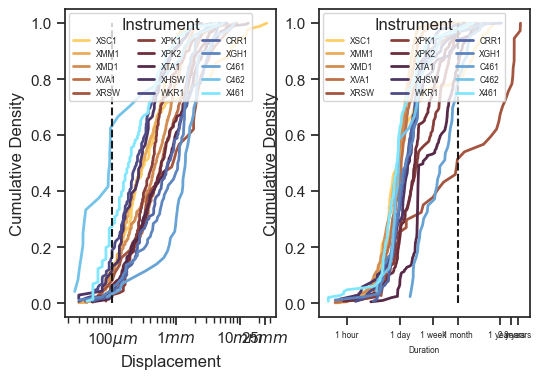

In [74]:
event_lines(PARK,df_all,cmap)

In [75]:
import seaborn as sns

In [76]:
def stats_builder(Network,df_all,cmap,network_string):
    sns.set_theme(style="ticks")
    df = df_all.copy(deep=True)
    if network_string == 'Others':
        dfa = df.drop(df[df['Network']!='DSF'].index)
        dfb = df.drop(df[df['Network']!='UTA'].index)
        dfc = df.drop(df[df['Network']!='CHAF'].index)
        df = pd.concat([dfa,dfb,dfc],ignore_index=True)
    else:
        df.drop(df[df['Network']!=network_string].index,inplace=True)
    print(network_string)
    print(np.round(np.percentile(df['Displacement, mm'],15),2),np.round(np.percentile(df['Displacement, mm'],85),2))
    print(np.round(np.percentile(df['Duration, hrs'],15)/24,2),'hrs', np.round((np.percentile(df['Duration, hrs'],85)/24),2),'days')
    return

In [77]:
stats_builder(HAY,df_all,cmap,'HAY')
stats_builder(HOL,df_all,cmap,'HOL')
stats_builder(PARK,df_all,cmap,'PARK')
stats_builder(SOCAL,df_all,cmap,'SOCAL')
stats_builder(EAF,df_all,cmap,'EAF')
stats_builder(NAF,df_all,cmap,'NAF')
stats_builder(RID,df_all,cmap,'RID')
stats_builder(UTA,df_all,cmap,'UTA')
stats_builder(DSF,df_all,cmap,'DSF')
stats_builder(CHAF,df_all,cmap,'CHAF')



HAY
0.16 0.88
1.99 hrs 23.17 days
HOL
0.09 2.46
0.26 hrs 2.81 days
PARK
0.13 1.29
0.41 hrs 3.74 days
SOCAL
0.04 0.9
0.26 hrs 14.07 days
EAF
0.03 0.21
0.1 hrs 1.03 days
NAF
0.03 0.65
0.1 hrs 2.78 days
RID
0.3 0.3
1.81 hrs 1.81 days
UTA
0.07 0.27
2.14 hrs 21.28 days
DSF
0.11 1.17
2.12 hrs 21.99 days
CHAF
0.19 2.81
1.56 hrs 30.26 days


In [78]:
def scatter_new(Network,df_all,cmap,network_string):
    sns.set_theme(style="ticks")
    df = df_all.copy(deep=True)
    if network_string == 'Others':
        dfa = df.drop(df[df['Network']!='DSF'].index)
        dfb = df.drop(df[df['Network']!='UTA'].index)
        dfc = df.drop(df[df['Network']!='CHAF'].index)
        df = pd.concat([dfa,dfb,dfc],ignore_index=True)
    else:
        df.drop(df[df['Network']!=network_string].index,inplace=True)
    colours  = cmap(np.linspace(0, 1, len(Network)))

    g = sns.jointplot(
        x=np.log(df["Displacement, mm"]), y=np.log(df["Duration, hrs"]), hue=df["Creepmeter abbreviation"],palette=colours,kind="scatter",marginal_kws={"fill": False})
    plt.legend(title="Instrument", loc="upper left", frameon=True,ncols=3,fontsize=6)
    plt.xticks([np.log(0.01),np.log(0.1),np.log(1),np.log(10),np.log(25)],[ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$',r'25$mm$'])
    plt.yticks([np.log(1/60),np.log(1),np.log(24),np.log(168),np.log(720),np.log(8760),np.log(2*8760),np.log(3*8760)],['1 minute','1 hour', '1 day', '1 week','1 month','1 year','2 years','3 years'])
    plt.xlim(np.log(0.01),np.log(30))
    plt.ylim(np.log(1/61),np.log(32000))
    plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hex_plots/'+network_string+'_jointplot_loglog.pdf',dpi=300)
    return

PARK
0.13 1.29
9.83 hrs 3.74 days
HAY
0.16 0.88
47.87 hrs 23.17 days


/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1832: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=self.x, y=self.y, **kwargs)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1889: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1832: UserWarning: Numpy array is not a supported type for `palette`. Please co

HOL
0.09 2.46
6.17 hrs 2.81 days
SOCAL
0.04 0.9
6.2 hrs 14.07 days


/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1832: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=self.x, y=self.y, **kwargs)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (14) than needed (11), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (14) than needed (11), which may not be intended.
  func(x=self.x, ax=self.ax_

EAF
0.03 0.21
2.5 hrs 1.03 days
NAF
0.03 0.65
2.29 hrs 2.78 days


/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1832: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=self.x, y=self.y, **kwargs)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1889: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/seaborn/axisgrid.py:1832: UserWarning: Numpy array is not a supported type for `palette`. Please co

Others
0.07 1.23
45.5 hrs 23.08 days


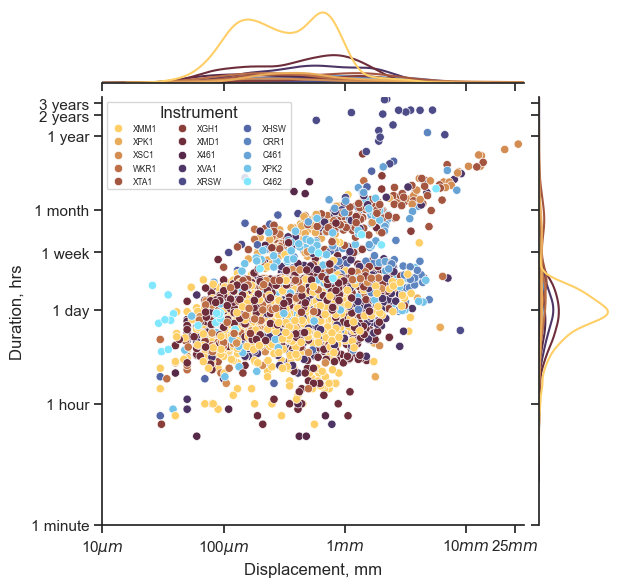

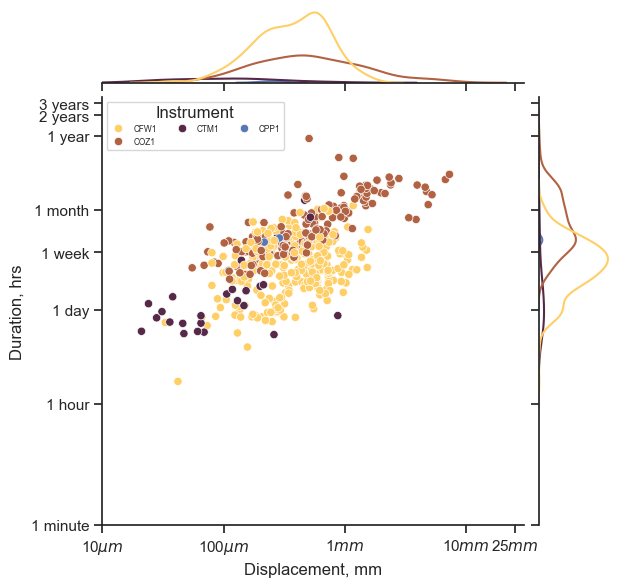

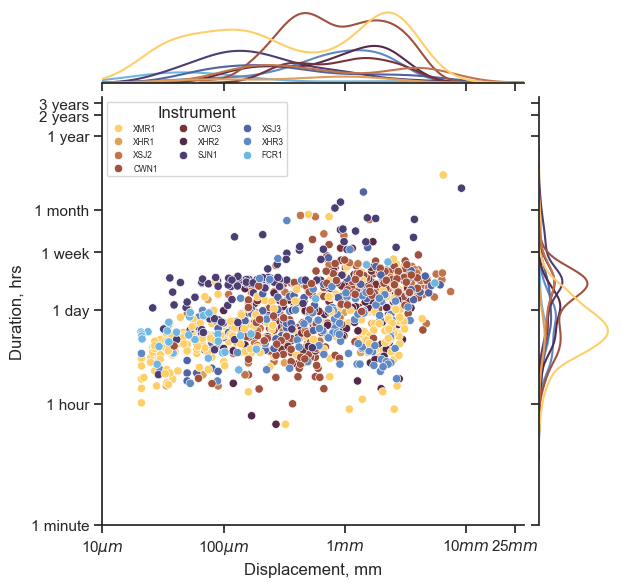

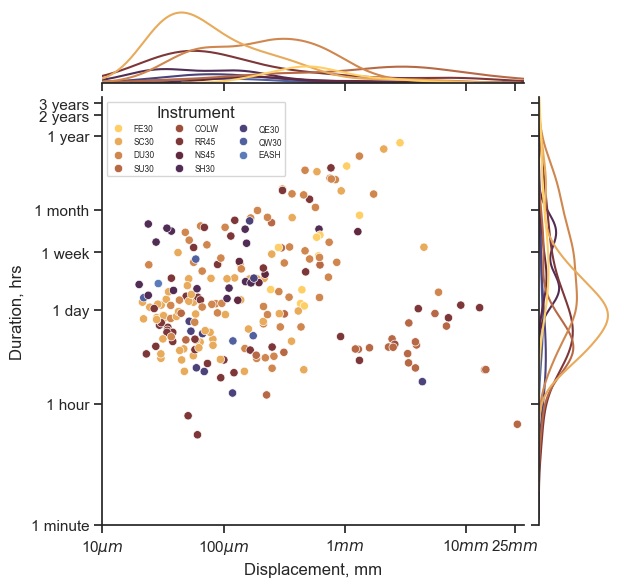

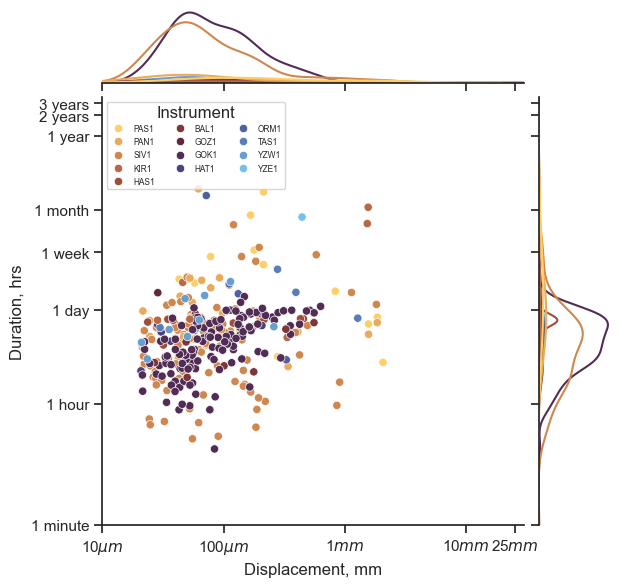

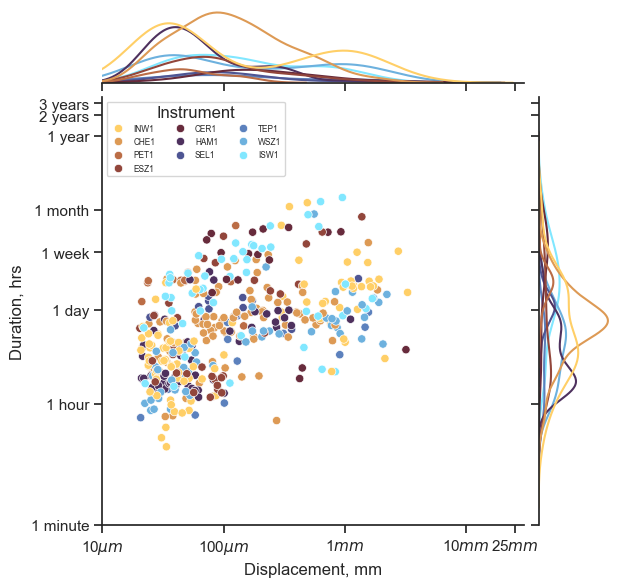

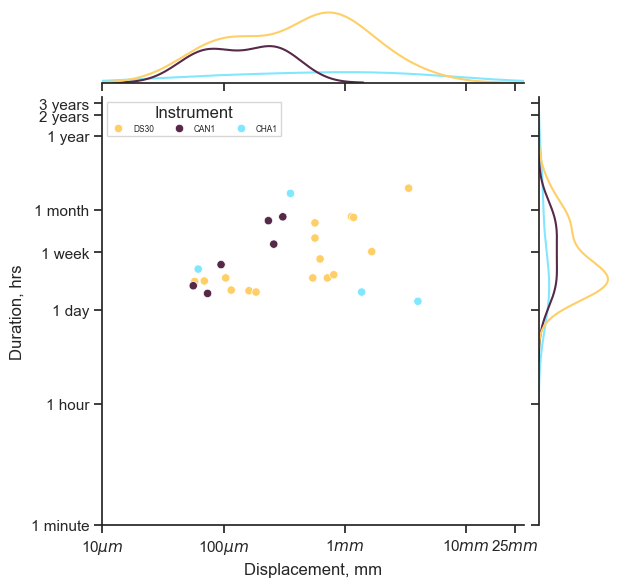

In [42]:
scatter_new(PARK,df_all,cmap,'PARK')
scatter_new(HAY,df_all,cmap,'HAY')
scatter_new(HOL,df_all,cmap,'HOL')
scatter_new(SOCAL,df_all,cmap,'SOCAL')
scatter_new(EAF,df_all,cmap,'EAF')
scatter_new(NAF,df_all,cmap,'NAF')
others = pd.concat([DSF,CHAF,UTA])
scatter_new(others,df_all,cmap,'Others')


In [79]:
df

NameError: name 'df' is not defined

In [80]:
df_numbered = pd.DataFrame()
for i in range(len(creepmeters)):
    cmeter = creepmeters['Creepmeter_abbrv'].iloc[i]
    df_cmeter = df_all.copy(deep=True)
    df_cmeter = df_all.drop(df_all[df_all['Creepmeter abbreviation']!=cmeter].index)
    print(cmeter,len(df_cmeter))
    df_cmeter.reset_index(inplace=True,drop=True)
    df_cmeter['meter number'] = creepmeters[creepmeters['Creepmeter_abbrv']==cmeter]['Creepmeter_number'].iloc[0]*len(df_cmeter)
    df_numbered = pd.concat([df_numbered,df_cmeter],ignore_index=True)
df_numbered

BAL1 8
C461 43
C462 24
CAN1 6
CER1 18
CFW1 288
CHA1 4
CHE1 93
CHP1 0
COZ1 168
CPP1 2
CRR1 139
CTM1 28
CWC3 70
CWN1 215
DS30 16
DU30 54
ESZ1 31
FCR1 34
FE30 12
GB 0
GD 0
GOK1 130
GOZ1 1
GS 0
HAM1 52
HAS1 8
HAT1 7
INW1 91
IR30 0
ISW1 46
KAR1 0
KIR1 6
NS45 5
ORM1 5
PAN1 20
PAS1 16
PET1 12
QE30 9
QW30 4
R7 0
RA 0
RB 1
RR45 40
SC30 63
SEL1 13
SH30 15
SIV1 112
SJN1 101
SU30 26
TAS1 4
TEP1 14
WKR1 158
WSZ1 52
X461 146
XGH1 88
XHR1 23
XHR2 99
XHR3 90
XHSW 69
XMD1 449
XMM1 1044
XMR1 302
XPK1 135
XPK2 138
XRSW 37
XSC1 91
XSH1 43
XSJ2 76
XSJ3 70
XTA1 203
XVA1 315
YZE1 1
YZW1 10
COML 0
COLE 0
COLW 1
EASH 1


Start Time        End Time Network   Creepmeter full name  \
0    2023-03-14 09:21:00   15/3/23 00:58     EAF             Balikburnu   
1    2023-03-20 11:24:00   21/3/23 08:25     EAF             Balikburnu   
2    2023-08-22 15:22:00   23/8/23 03:53     EAF             Balikburnu   
3    2023-08-23 03:53:00   23/8/23 07:30     EAF             Balikburnu   
4    2023-08-23 07:30:00   23/8/23 09:57     EAF             Balikburnu   
...                  ...             ...     ...                    ...   
5690 2023-11-19 07:04:00  20/11/23 00:08     EAF            Yazica West   
5691 2023-11-26 08:36:00  27/11/23 19:48     EAF            Yazica West   
5692 2023-05-12 10:16:00   8/12/23 00:54     EAF            Yazica West   
5693 2010-06-15 04:05:00   15/6/10 11:35   SOCAL              Yuha West   
5694 2021-07-25 08:17:00   27/7/21 18:58   SOCAL  East Shoreline Normal   

     Creepmeter abbreviation  Latitude  Longitude                 Fault  \
0                       BAL1   37.9903    38.1990  East Anatolian Fault   
1                       BAL1   37.9903    38.1990  East Anatolian Fault   
2                       BAL1   37.9903    38.1990  East Anatolian Fault   
3                       BAL1   37.9903    38.1990  East Anatolian Fault   
4                       BAL1   37.9903    38.1990  East Anatolian Fault   
...                      ...       ...        ...                   ...   
5690                    YZW1   38.1086    38.7361  East Anatolian Fault   
5691                    YZW1   38.1086    38.7361  East Anatolian Fault   
5692                    YZW1   38.1086    38.7361  East Anatolian Fault   
5693                    COLW   32.6483  -115.8480   Laguna Salada Fault   
5694                    EASH   33.3710  -115.7801  East Shoreline Fault   

                      Event type  Sampling rate, s  Displacement, mm  \
0     Episodic Creep Event (ECE)                60          0.555526   
1                Creeplet (CLTS)                60          0.058428   
2     Episodic Creep Event (ECE)                60          0.325741   
3     Episodic Creep Event (ECE)                60          0.100805   
4                Creeplet (CLTS)                60          0.049999   
...                          ...               ...               ...   
5690             Creeplet (CLTS)                60          0.063114   
5691             Creeplet (CLTS)                60          0.048099   
5692  Episodic Creep Event (ECE)                60          0.113898   
5693  Episodic Creep Event (ECE)              1800          2.574982   
5694             Creeplet (CLTS)                60          0.028913   

      Duration, hrs Potentially triggered by earthquake  \
0         15.616667                                  No   
1         21.016667                                  No   
2         12.516667                                  No   
3          3.616667                                  No   
4          2.450000                                  No   
...             ...                                 ...   
5690      17.066667                                  No   
5691      35.200000                                  No   
5692      62.633333                                  No   
5693       7.500000                                  No   
5694      58.683333                                  No   

     Details of potential earthquake trigger  meter number  
0                                                      504  
1                                                      504  
2                                                      504  
3                                                      504  
4                                                      504  
...                                      ...           ...  
5690                                                   650  
5691                                                   650  
5692                                                   650  
5693                        

In [81]:
sns.displot(data=df, kind="ecdf", x="Displacement, mm", hue="Creepmeter abbreviation", rug=True, palette=colours)
plt.xscale('log')
plt.vlines([0.1],0,1,colors='grey',linestyles='dashed')

NameError: name 'df' is not defined

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_33404/2826936495.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_33404/2826936495.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid valu

no events


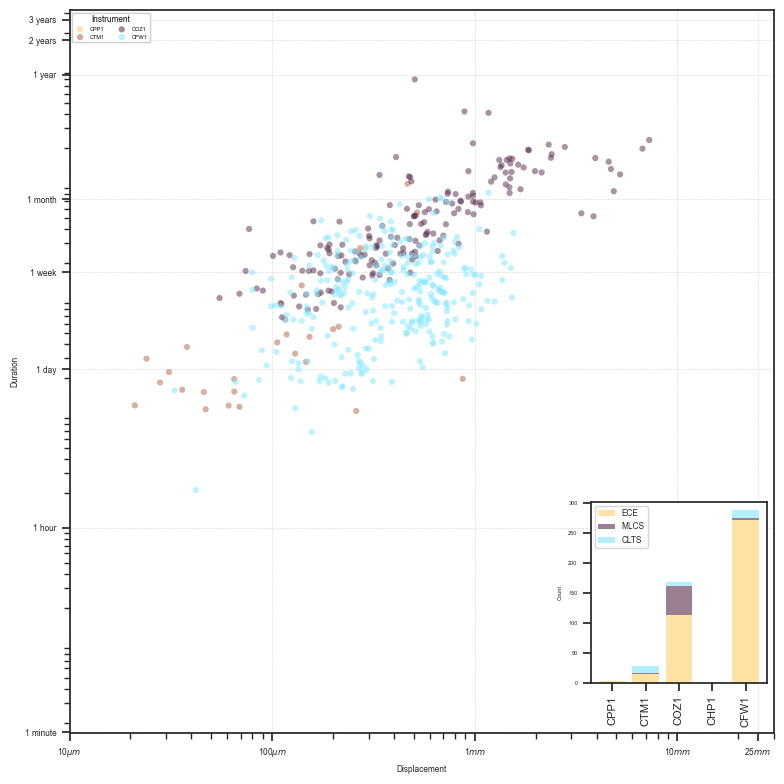

In [217]:
# Plot Hayward duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(HAY,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hayward_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='s')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or pr

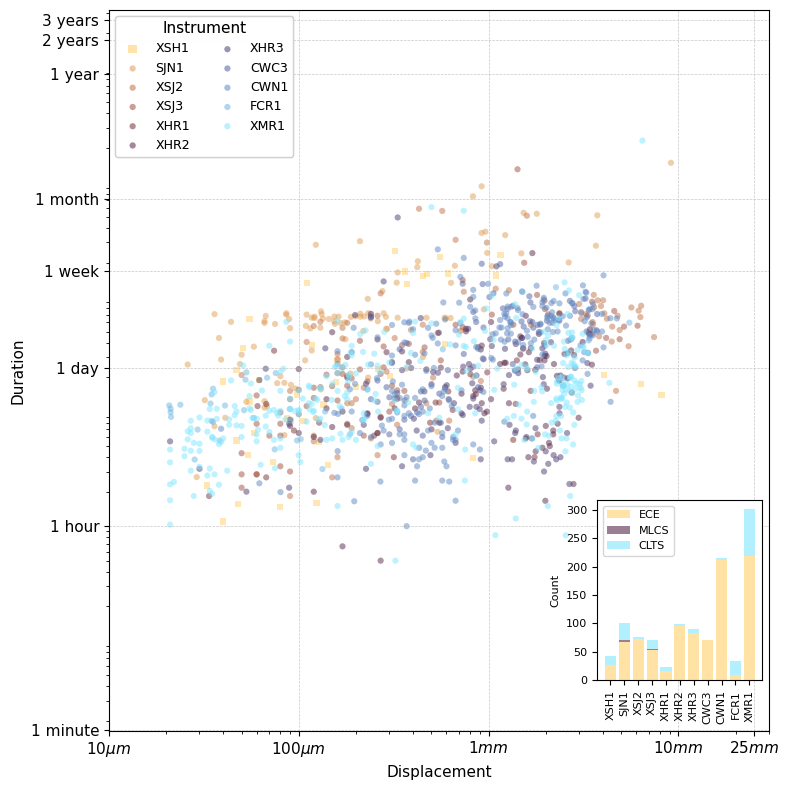

In [12]:
# Plot Hollister duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(HOL,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hollister_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide 

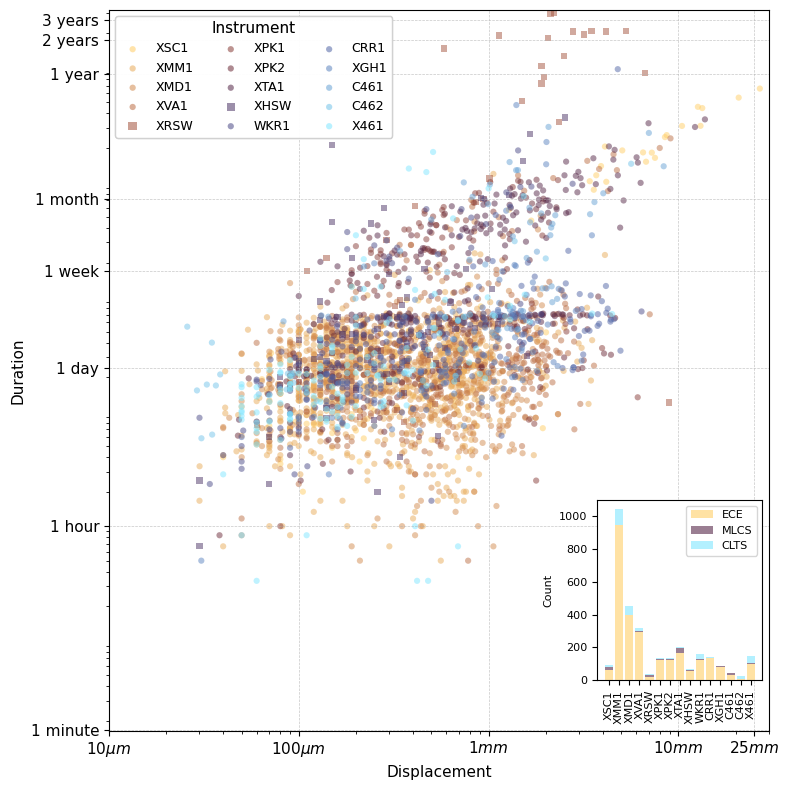

In [13]:
# Plot Parkfield duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(PARK,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/Parkfield_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatt

no events
no events
no events


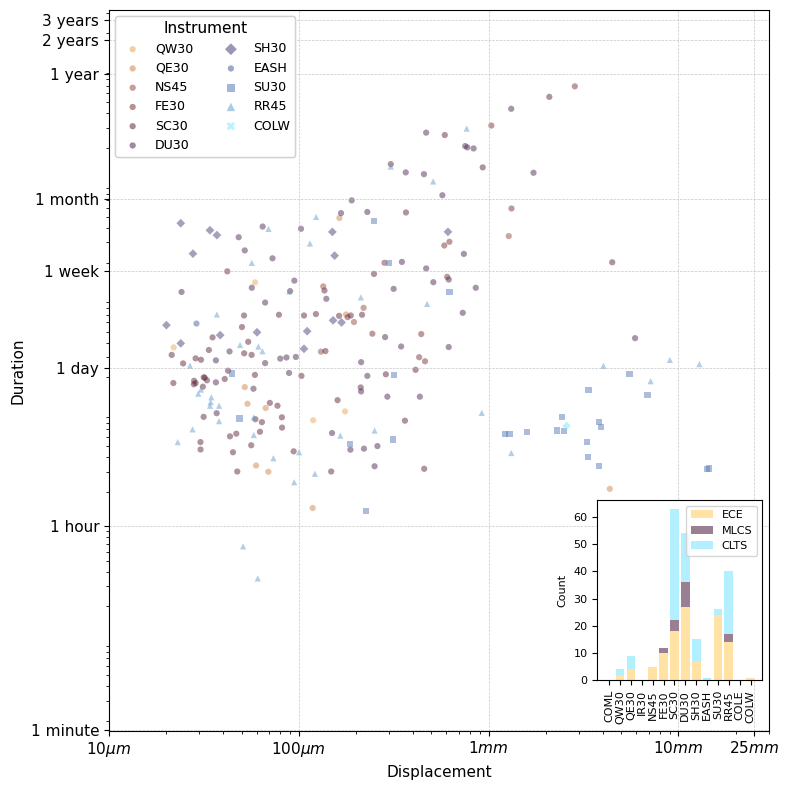

In [14]:
# Plot SoCal duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(SOCAL,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/SoCal_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:93: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,30])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/846973921.py:6: UserWarning: This figure includes Axes that are n

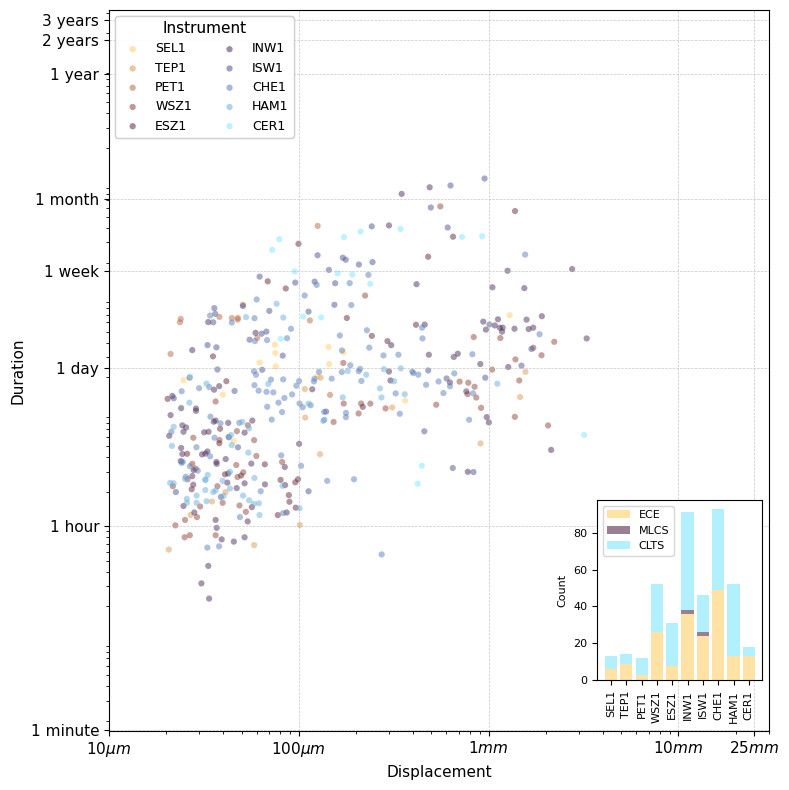

In [15]:
# Plot North Anatolia duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(NAF,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/NAF_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid valu

no events


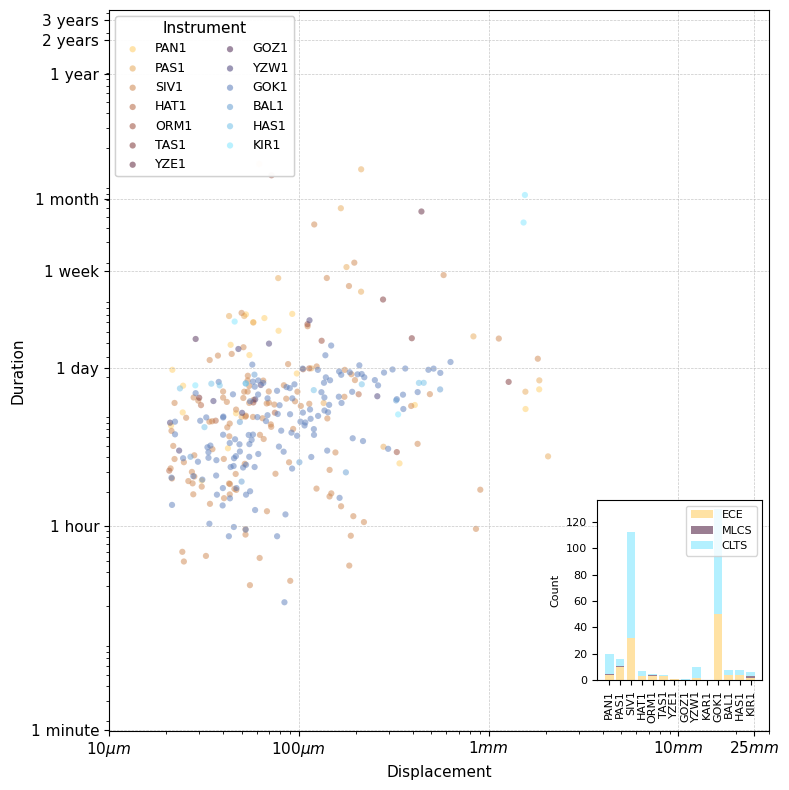

In [16]:
# Plot East Anatolia duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(EAF,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/EAF_duration_vs_displacement_bars.pdf')
plt.show()

In [17]:
others = pd.concat([DSF,CHAF,UTA])

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='s')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_16874/2540147492.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or pr

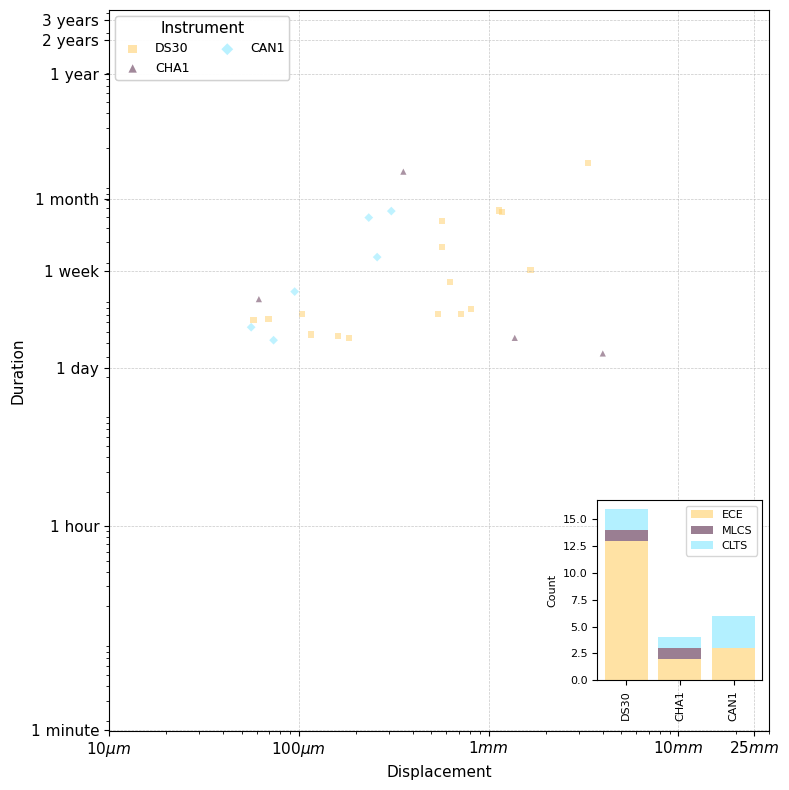

In [18]:
# Plot Israel, Pakistan and Utah duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(others,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/Utah_Pakistan_Israel_duration_vs_displacement_bars.pdf')
plt.show()

Maps

In [82]:
'''def utm_from_lon(lon):
    """
    utm_from_lon - UTM zone for a longitude

    Not right for some polar regions (Norway, Svalbard, Antartica)

    :param float lon: longitude
    :return: UTM zone number
    :rtype: int
    """
    return floor( ( lon + 180 ) / 6) + 1

def scale_bar(ax, proj, length, location=(0.2, 0.05), linewidth=3,
              units='km', m_per_unit=1000):
    """

    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    # Projection in metres
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    # Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * m_per_unit/2, sbcx + length * m_per_unit/2]
    # buffer for scalebar
    buffer = [pe.withStroke(linewidth=5, foreground="w")]
    # Plot the scalebar with buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, path_effects=buffer)
    # buffer for text
    buffer = [pe.withStroke(linewidth=3, foreground="w")]
    # Plot the scalebar label
    t0 = ax.text(sbcx, sbcy, str(length) + ' ' + units, transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    left = x0+(x1-x0)*0.05
    # Plot the N arrow
    t1 = ax.text(left, sbcy, u'\u25B2\nN', transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    # Plot the scalebar without buffer, in case covered by text buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, zorder=3)


def cm_plotter(ax,creepmeters_list,gdf,extent,color,shift,scale,show_labels=True):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    # Add Fault geometries
    ax.add_geometries(gdf.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    # Add gridlines with specific label font sizes
    gl = ax.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        gl.xformatter = mticker.FormatStrFormatter('%.1f')
        gl.yformatter = mticker.FormatStrFormatter('%.1f')



        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(extent[0], 1), np.round(extent[1], 1)
        lat_min, lat_max = np.round(extent[2], 1), np.round(extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range < 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range < 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    # Add annotation with an arrow and transform
    for i in range(len(creepmeters_list)):
        abbrv = creepmeters_list['Creepmeter_abbrv'].iloc[i]
        lat = creepmeters_list['Latitude'].iloc[i]
        long = creepmeters_list['Longitude'].iloc[i]
        face_color = rgb2hex(color[i])
        # Default xytext offset
        if shift == 'horizontal':
            # Adjust xytext for specific creepmeter abbreviations
            if abbrv in ['XRSW', 'XTA1','XHSW', 'C461','CWN1','CRR1','XMM1','XSJ3','XHR2','QE30','NS45','DU30','RA','GS','XMR1','CFW1']:
                xytext_lon = long - 0.1  # Subtract 0.1 for these specific abbreviations
            else:
                xytext_lon = long + 0.1
            if abbrv in ['CPP1','CWC3','CWN1','XSJ2']:
                xytext_lat = lat-0.01
            elif abbrv in ['X461','XPK2']:
                xytext_lat = lat-0.02
            elif abbrv in ['XRSW']:
                xytext_lat = lat+0.01
            elif abbrv in ['XHR1']:
                xytext_lat = lat+0.03
                xytext_lon = long - 0.1

            else:
                xytext_lat = lat
        if shift == 'vertical':
            if abbrv in ['NS45','COLW']:
                xytext_lon = long 
                xytext_lat = lat + 0.2
            elif abbrv in ['SH30']:
                xytext_lon = long + 0.2
                xytext_lat = lat
            elif abbrv in ['EASH']:
                xytext_lon = long + 0.3
                xytext_lat = lat - 0.2
            elif abbrv in ['DU30']:
                xytext_lon = long + 0.3
                xytext_lat = lat + 0.2
            elif abbrv in ['QW30']:
                xytext_lon = long - 0.1
                xytext_lat = lat + 0.2
            elif abbrv in ['QE30']:
                xytext_lon = long - 0.1
                xytext_lat = lat - 0.2
            elif abbrv in ['SC30']:
                xytext_lon = long + 0.1
                xytext_lat = lat + 0.2
            else:
                xytext_lon = long 
                xytext_lat = lat - 0.2
        
        
        
        ax.annotate(
            creepmeters_list['Creepmeter_abbrv'].iloc[i], 
            xy=(creepmeters_list['Longitude'].iloc[i], creepmeters_list['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        ax.scatter(
            creepmeters_list['Longitude'].iloc[i], 
            creepmeters_list['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
        scale_bar(ax, ccrs.PlateCarree(), scale)
    return





def ymd_to_ydec(ST):
    y = int(ST.strftime("%Y"))
    dt_starter = dt.datetime(y,1,1,0,0,0)
    diff = (ST.replace(tzinfo=None)-dt_starter)/dt.timedelta(days=1)
    isleapyear = calendar.isleap(y)
    if isleapyear == True:
        diff_dec = diff/366
    else:
        diff_dec = diff/365
    date_dec = y+diff_dec
    return date_dec'''


    

'def utm_from_lon(lon):\n    """\n    utm_from_lon - UTM zone for a longitude\n\n    Not right for some polar regions (Norway, Svalbard, Antartica)\n\n    :param float lon: longitude\n    :return: UTM zone number\n    :rtype: int\n    """\n    return floor( ( lon + 180 ) / 6) + 1\n\ndef scale_bar(ax, proj, length, location=(0.2, 0.05), linewidth=3,\n              units=\'km\', m_per_unit=1000):\n    """\n\n    http://stackoverflow.com/a/35705477/1072212\n    ax is the axes to draw the scalebar on.\n    proj is the projection the axes are in\n    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot\n    length is the length of the scalebar in km.\n    linewidth is the thickness of the scalebar.\n    units is the name of the unit\n    m_per_unit is the number of meters in a unit\n    """\n    # find lat/lon center to find best UTM zone\n    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())\n    # Projection in metres\n    utm = ccrs.UTM(utm_from_lon((

In [83]:


# Create a map subplot with OpenStreetMap tiles and custom features
def mapsubplot(axis,extent,cmap,instrument_dataframe,faults,scale,shift):
    colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
    # Initialize OpenStreetMap tiles
    osm = img_tiles.OSM()
    # Add OpenStreetMap tiles to the plot
    axis.add_image(osm, 10)  # Zoom level of 8  
    # Add natural earth features for oceans and lakes
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axis.add_feature(ocean, zorder=0)  # Add oceans first
    axis.add_feature(lakes, zorder=1)  # Add lakes
    axis.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axis.coastlines(resolution='50m')
    cm_plotter(axis,instrument_dataframe,faults,extent,colours,shift,scale)
    return

In [88]:
def pandas_to_geopandas(df):
    gdf = geopandas.GeoDataFrame(
        df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
    )
    return gdf

In [89]:
gdf_san_andreas = gdf_Cali[gdf_Cali['fault_name']=='San Andreas fault zone']
gdf_hawyward = gdf_Cali[gdf_Cali['fault_name']=='Hayward fault zone']
gdf_calaveras = gdf_Cali[gdf_Cali['fault_name']=='Calaveras fault zone']
gdf_imperial = gdf_Cali[gdf_Cali['fault_name']=='Imperial fault']
gdf_superstition = gdf_Cali[gdf_Cali['sec_name']=='Superstition Hills section']
gdf_garlock = gdf_Cali[gdf_Cali['fault_name']=='Garlock fault zone']
gdf_san_jacinto = gdf_Cali[gdf_Cali['sec_name']=='San Jacinto Valley section']
gdf_needles = gdf_Utah[gdf_Utah['fault_name']=='Needles fault zone']
gdf_Laguna_Salada = gdf_Cali[gdf_Cali['sec_name']=='Laguna Salada section']
gdf_north_anatiolia = gdf_Asia[gdf_Asia['ZONE_NAME']=='North Anatolian']
gdf_east_anatiolia = gdf_Asia[gdf_Asia['ZONE_NAME']=='East Anatolian']
gdf_chaman = gdf_Asia[gdf_Asia['ZONE_NAME']=='Chaman']
gdf_dead_sea = gdf_Asia[gdf_Asia['ZONE_NAME']=='Dead Sea Transform']
gdf_surgu = gdf_Asia[gdf_Asia['ZONE_NAME']=='Surgu']
gdf_Elbistan = gdf_Asia[gdf_Asia['ZONE_NAME']=='Elbistan']

Sariz_creepmeter_faults = [18118, 18119, 18120,18121, 18123, 18128, 18129, 18114, 18122, 18125, 18130]
gdf_Sariz = gdf_Asia.loc[Sariz_creepmeter_faults]

In [90]:
gdf_north_anatiolia

RATE CONF SENS1 SENS2 UPSIDE        ZONE_NAME  \
4878     3    C     D     N      S  North Anatolian   
4884     2    B     D     N      S  North Anatolian   
4885     1    A     D     N      S  North Anatolian   
4886     3    B     D     N     SW  North Anatolian   
4887     3    C     D     N      S  North Anatolian   
...    ...  ...   ...   ...    ...              ...   
26486    3    C     D  None   None  North Anatolian   
26487    2    B     D     N     SW  North Anatolian   
26489    1    A     D  None   None  North Anatolian   
34962    3    C     D     R     SW  North Anatolian   
34963    3    C     D     R     SW  North Anatolian   

                                  FAULT_NAME  \
4878   South Cinarcik 1894 Eq, Izmit Korfezi   
4884                                Altinova   
4885                Tepetarla, Izmit 1999 Eq   
4886                                    None   
4887                                    None   
...                                      ...   
26486                                   None   
26487                       Dagyolu Caglayan   
26489        Bayramoren, Bolu Gerede 1944 Eq   
34962                                   None   
34963                                   None   

                                                    AUTH  \
4878             Kuscu et al., 1988; Basili et al., 2013   
4884   Kuscu et al., 1988; Saroglu et al., 1992; Bird...   
4885   Kuscu et al., 1988; Basili et al., 2013; Emre ...   
4886               Kuscu et al., 1988; Emre et al., 2013   
4887               Ambraseys, 1970; Tsukuda et al., 1988   
...                                                  ...   
26486                              Trifonov et al., 1993   
26487  Trifonov et al., 1993; Basili et al., 2013; Em...   
26489  Ambraseys, 1970, 1975; Saroglu et al., 1992; M...   
34962                              Trifonov et al., 1993   
34963                              Trifonov et al., 1993   

                                                    PARM  \
4878   Signs= GP | Sense= D; Rate= 7.63-10.13; Depth=...   
4884   Signs= EQ, DT, LS | Age= Q4, Q42 (Emre et al.,...   
4885   Signs= DT, EQ | Age= Q42 (Emre et al., 2013) |...   
4886   Signs= DT | Age= Q4; Sense= N; Side= +SW (Emre...   
4887   Signs= ER | Seism= M6.25 20.06.1943 40.800 30....   
...                                                  ...   
26486  Signs= EQ | Seism= (?) M5.8 1995-12-05 D15 km ...   
26487  Signs= EQ, DT | Age= Q4 (Emre et al., 2013) | ...   
26489  Signs= ER | Seism= M7.6, 01.02.1944, 41.000 33...   
34962  Signs= EQ, LS | Seism= M5.8 18.03 1992 (DB, 1996)   
34963  Signs= EQ, LS | Seism= M5.8 18.03 1992 (DB, 1996)   

                                                    TEXT  FAULT_ID  \
4878                                                None      4878   
4884   Sharp hill escarpment | Marked as active f. (E...      4884   
4885   Hill escarpment | Dip to N 83-85 (Basili et al...      4885   
4886   Hill escarpment | Marked as active f. (Emre et...      4886   
4887                                    Ridge escarpment      4887   
...                                                  ...       ...   
26486                                               None     26486   
26487                  Dip to S 75 (Basili et al., 2013)     26487   
26489  Ridge escarpment | Dip to N 70 (Basili et al.,...     26489   
34962                            Straight valley segment     34962   
34963                            Straight valley segment     34963   

                                                geometry  
4878   LINESTRING (29.32008 40.68581, 29.34387 40.688...  
4884   LINESTRING (29.32751 40.6754, 29.34387 40.6754...  
4885   LINESTRING (29.91771 40.71107, 29.93102 40.715...  
4886   LINESTRING (30.45387 40.68858, 30.47046 40.678...  
4887   LINESTRING (30.70349 40.73853, 30.7368 40.7492...  
...                                                  ...  
26486  LINESTRING (40.07566 39.45949, 40.10516 39.453...  
26487  LINEST

In [94]:

# Suppress specific warning
warnings.filterwarnings("ignore", message="Approximating coordinate system")

hollister_extent = [-121.65,-121.15,36.5,37.0]
hayward_extent = [-122.42,-121.92,37.5,38]
parkfield_extent = [-120.65,-120.1,35.55,36.1]
salton_sea_extent = [-117.25,-115.25,32.2,34.2]
RID_extent = [-117.8,-117.2, 35.2,35.8]
UTA_extent = [-110.25,-109.75, 37.75,38.25]
NAF_zoom_extent = [32.5,33,40.8,41.0]
EAF_extent = [36.0, 40.25, 36.0, 39]
NAF_extent = [29.5,33.1,40.4,41.1]
NAF_extent_W = [29.5,30.5,40.6,40.8]
pakistan_extent = [65, 67, 30, 32]
Israel_extent = [35, 36, 31, 32]
rheology_extent = [-122,-121,36.6,37.1]

In [174]:
def get_zoom_for_extent(zoom_levels,extent):
    return zoom_levels.get(tuple(extent), None)


In [182]:
def map_greyscale(extent, creepmeters, main_fault, auxilary_faults,filename):

    points = geopandas.GeoSeries(
        [Point(extent[0], extent[3]), Point(extent[1], extent[3])], crs=4326
    )  # Geographic WGS 84 - degrees
    points = points.to_crs(32619)  # Projected WGS 84 - meters
    distance_meters = points[0].distance(points[1])

    gdf = pandas_to_geopandas(creepmeters)

# Plot points
    cmap = cmc.managua
    colours  = cmap(np.linspace(0, 1, 6))

    ax = auxilary_faults.plot(figsize=(6,6),facecolor='none',edgecolor='k',linewidth=1.5,alpha=0.5,label='Other faults')
    if extent in [hayward_extent,parkfield_extent,hollister_extent,salton_sea_extent,RID_extent,UTA_extent,rheology_extent]:
        main_fault.plot(ax=ax,facecolor='none',edgecolor=colours[0],linewidth=2,label=main_fault['fault_name'].iloc[0])
    elif extent in [NAF_extent,NAF_zoom_extent,NAF_extent_W]:
        main_fault.plot(ax=ax,facecolor='none',edgecolor=colours[0],linewidth=2,label='North Anatolian fault zone')
    elif extent in [EAF_extent]:
        main_fault.plot(ax=ax,facecolor='none',edgecolor=colours[0],linewidth=2,label='East Anatolian fault zone')
    elif extent in [Israel_extent]:
        main_fault.plot(ax=ax,facecolor='none',edgecolor=colours[0],linewidth=2,label='Dead Sea Transform')
    elif extent in [pakistan_extent]:
        main_fault.plot(ax=ax,facecolor='none',edgecolor=colours[0],linewidth=2,label='Chaman fault zone')

    if extent in [hollister_extent, rheology_extent]:
        gdf_calaveras.plot(ax=ax,facecolor='none',edgecolor=colours[1],linewidth=2,label='Calaveras Fault')
    if extent==salton_sea_extent:
        gdf_imperial.plot(ax=ax,facecolor='none',edgecolor=colours[1],linewidth=2,label='Imperial Fault')
        gdf_superstition.plot(ax=ax,facecolor='none',edgecolor=colours[2],linewidth=2,label='San Jacinto Fault, Superstition Hills Section')
        gdf_san_jacinto.plot(ax=ax,facecolor='none',edgecolor=colours[3],linewidth=2,label='San Jacinto Fault, Valley Section')
        gdf_Laguna_Salada.plot(ax=ax,facecolor='none',edgecolor=colours[4],linewidth=2, label = 'Elsinore fault zone, Laguna Salada Section')
    if extent ==EAF_extent:
        gdf_surgu.plot(ax=ax,facecolor='none',edgecolor=colours[1],linewidth=2,label='Sürgü Fault')
        gdf_Elbistan.plot(ax=ax,facecolor='none',edgecolor=colours[2],linewidth=2,label ='Elbistan Fault')
        gdf_Sariz.plot(ax=ax,facecolor='none',edgecolor=colours[3],linewidth=2,label='Sarız Fault')
    if extent == RID_extent:
        gdf_ridgecrest.plot(ax=ax,facecolor='none',edgecolor=colours[1],linewidth=2,label='2019 Ridgecrest Ruptures')

    
      
    plt.xlim(extent[0],extent[1])
    plt.ylim(extent[2], extent[3])
    gdf.plot(ax=ax, color=colours[5], markersize=50,zorder=10,edgecolor='k')
    ax.add_artist(ScaleBar(distance_meters,location='center left',box_alpha=0.0,font_properties={'size':12}))
    
    # Add Stamen Terrain basemap
    API_KEY = "97d94fc2-e285-4aa1-b987-dc9178a31b0d"
    # Add your API key to the desired style from contextily providers
    provider = cx.providers.Stadia.StamenTerrain(api_key="97d94fc2-e285-4aa1-b987-dc9178a31b0d")
    # Define Zoom levels based on region.
    zoom_levels = {
    tuple(hayward_extent): 10,
    tuple(hollister_extent): 10,
    tuple(parkfield_extent): 10,
    tuple(RID_extent): 10,
    tuple(salton_sea_extent): 8,
    tuple(UTA_extent): 10,
    tuple(NAF_zoom_extent): 11,
    tuple(EAF_extent): 7,
    tuple(pakistan_extent): 8,
    tuple(Israel_extent): 9,
    tuple(NAF_extent_W): 10
}

    chosen_zoom_level = get_zoom_for_extent(zoom_levels,extent)

    # Update the provider URL to include your API key
    provider["url"] = provider["url"] + "?api_key={api_key}"
    cx.add_basemap(ax, crs=gdf.crs, source=provider,zoom=chosen_zoom_level)

    # Convert the image tiles to grayscale
    for im in ax.get_images():
        arr = np.array(im.get_array())  # RGB array
        # Convert RGB to grayscale using standard weights
        gray = np.dot(arr[...,:3], [0.2989, 0.5870, 0.1140])
        # Replace the image array with grayscale (expand dims to RGB-like)
        im.set_data(np.stack([gray]*3, axis=-1).astype(np.uint8))
    #north_arrow(ax, location="upper left", rotation={"crs": gdf.crs, "reference": "center"})

    # Annotate creepmeters points on an EPSG:4326 map
    for _, row in creepmeters.iterrows():
        ax.text(
            row['Longitude'],    # x-coordinate = longitude
            row['Latitude'],     # y-coordinate = latitude
            row['Creepmeter_abbrv'],  # label text
            fontsize=12,
            ha='center',
            va='center'
        )
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=9,loc='upper right',frameon=True) 
    plt.savefig(filename,dpi=300,bbox_inches='tight')
    plt.show()
    return

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


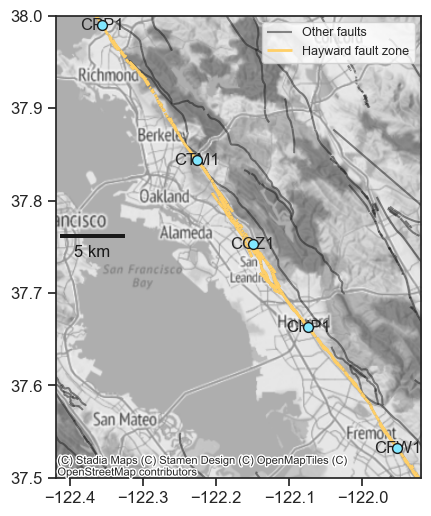

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


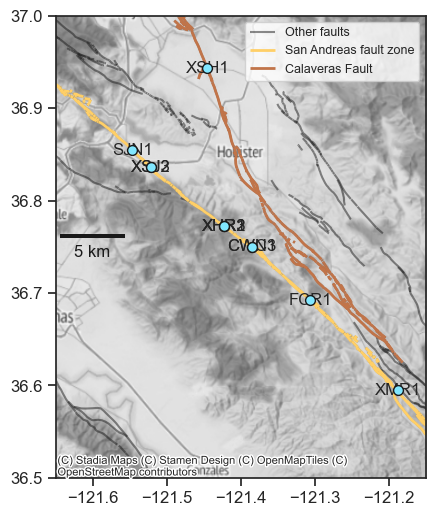

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


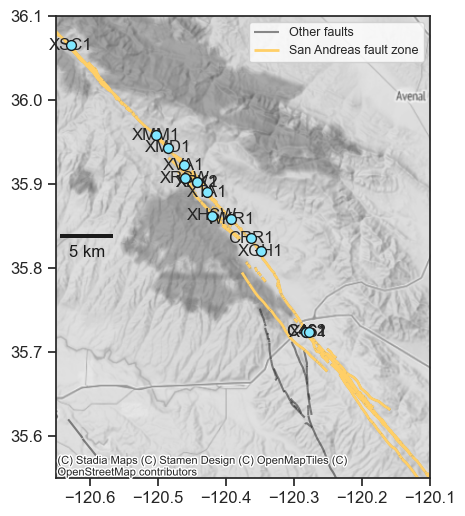

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


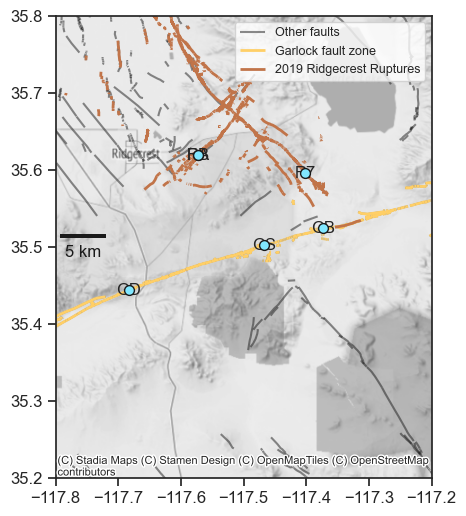

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


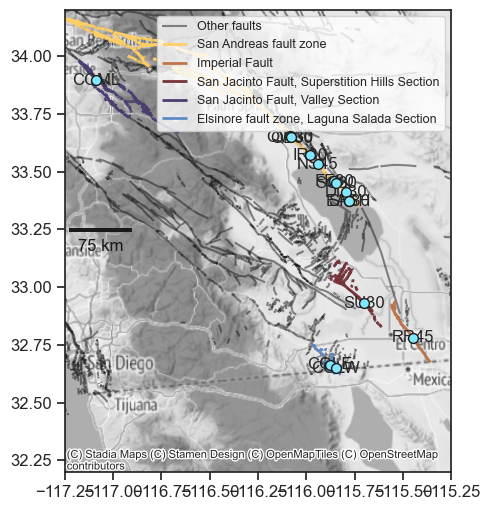

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


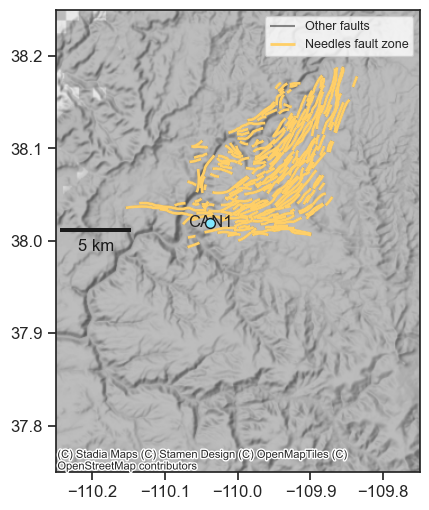

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


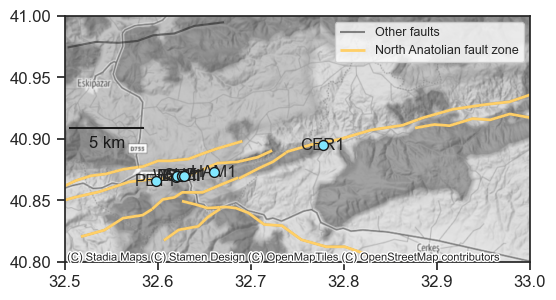

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


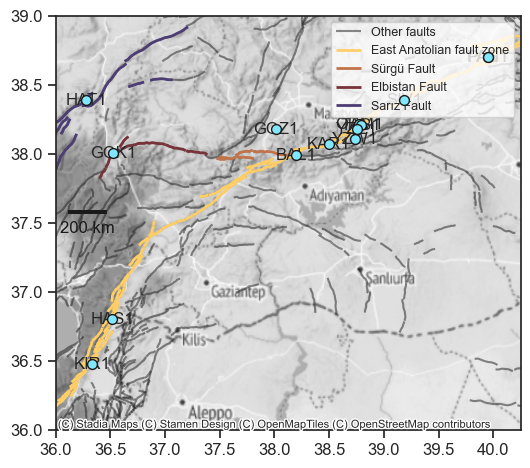

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


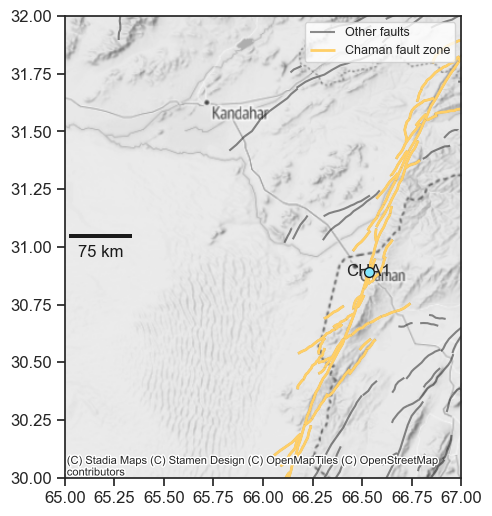

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


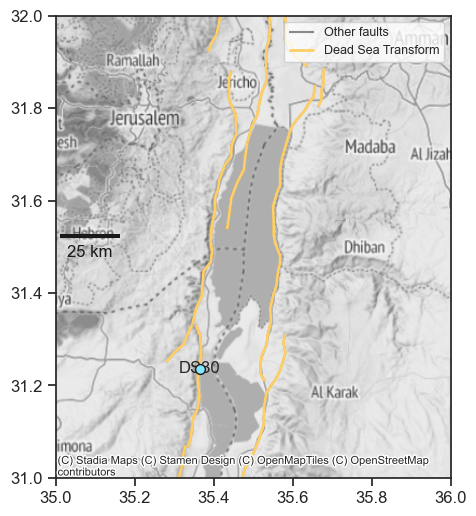

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


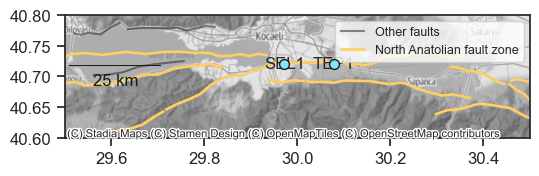

In [183]:
map_greyscale(hayward_extent,HAY,gdf_hawyward,gdf_Cali,'../../Creep_catalog_stats_figures/New Plots/Hayward_map_greyscale.pdf')#10
map_greyscale(hollister_extent,HOL,gdf_san_andreas,gdf_Cali,'../../Creep_catalog_stats_figures/New Plots/Hollister_map_greyscale.pdf')#10
map_greyscale(parkfield_extent,PARK,gdf_san_andreas,gdf_Cali,'../../Creep_catalog_stats_figures/New Plots/Parkfield_map_greyscale.pdf')#10
map_greyscale(RID_extent,RID,gdf_garlock,gdf_Cali,'../../Creep_catalog_stats_figures/New Plots/Ridgecrest_map_greyscale.pdf')#10
map_greyscale(salton_sea_extent,SOCAL,gdf_san_andreas,gdf_Cali,'../../Creep_catalog_stats_figures/New Plots/SoCal_map_greyscale.pdf')#8
map_greyscale(UTA_extent,UTA,gdf_needles,gdf_Utah,'../../Creep_catalog_stats_figures/New Plots/Utah_map_greyscale.pdf')#10
map_greyscale(NAF_zoom_extent,NAF_E,gdf_north_anatiolia,gdf_Asia,'../../Creep_catalog_stats_figures/New Plots/NAF_map_Ismetpasa_greyscale_zoom.pdf')#11
#map_greyscale(NAF_extent,NAF,gdf_north_anatiolia,gdf_Asia,'../../Creep_catalog_stats_figures/New Plots/NAF_map_greyscale.pdf')
map_greyscale(EAF_extent,EAF,gdf_east_anatiolia,gdf_Asia,'../../Creep_catalog_stats_figures/New Plots/EAF_map_greyscale.pdf')#7
map_greyscale(pakistan_extent,CHAF,gdf_chaman,gdf_Asia,'../../Creep_catalog_stats_figures/New Plots/Pakistan_map_greyscale.pdf')#8
map_greyscale(Israel_extent,DSF,gdf_dead_sea,gdf_Asia,'../../Creep_catalog_stats_figures/New Plots/Israel_map_greyscale.pdf') #9
map_greyscale(NAF_extent_W,NAF_W,gdf_north_anatiolia,gdf_Asia,'../../Creep_catalog_stats_figures/New Plots/NAF_map_greyscale_Ismit.pdf')#10

/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


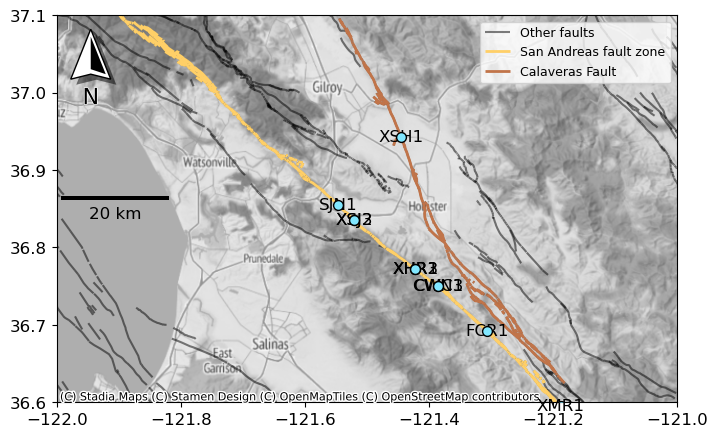

In [ ]:


map_greyscale(rheology_extent,HOL,gdf_san_andreas,gdf_Cali,'../../Hollister_map_greyscale_rheology_paper.pdf')


In [28]:
'''# Plot Hayward map
fig = plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axa,hayward_extent,cmap,HAY,gdf_Cali,10,'horizontal')
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hayward_map.pdf')
plt.show()'''

"# Plot Hayward map\nfig = plt.figure(figsize=(20,8))\naxa = plt.subplot(1,1,1,projection=ccrs.PlateCarree())\nmapsubplot(axa,hayward_extent,cmap,HAY,gdf_Cali,10,'horizontal')\n#plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hayward_map.pdf')\nplt.show()"

In [29]:
'''# Plot Hollister map
fig = plt.figure(figsize=(20,8))
axb = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axb,hollister_extent,cmap,HOL,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hollister_map.pdf')
plt.show()'''



"# Plot Hollister map\nfig = plt.figure(figsize=(20,8))\naxb = plt.subplot(1,1,1,projection=ccrs.PlateCarree())\nmapsubplot(axb,hollister_extent,cmap,HOL,gdf_Cali,10,'horizontal')\nplt.savefig('../../Creep_catalog_stats_figures/New Plots/Hollister_map.pdf')\nplt.show()"

In [30]:
'''# Plot Parkfield map
fig = plt.figure(figsize=(20,8))
axc = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axc,parkfield_extent,cmap,PARK,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Parkfield_map.pdf')
plt.show()'''


"# Plot Parkfield map\nfig = plt.figure(figsize=(20,8))\naxc = plt.subplot(1,1,1,projection=ccrs.PlateCarree())\nmapsubplot(axc,parkfield_extent,cmap,PARK,gdf_Cali,10,'horizontal')\nplt.savefig('../../Creep_catalog_stats_figures/New Plots/Parkfield_map.pdf')\nplt.show()"

In [31]:
'''# Plot SoCal map
fig = plt.figure(figsize=(20,8))
axd = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axd,salton_sea_extent,cmap,SOCAL,gdf_Cali,10,'vertical')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/SOCAL_map.pdf')
plt.show()'''

"# Plot SoCal map\nfig = plt.figure(figsize=(20,8))\naxd = plt.subplot(1,1,1,projection=ccrs.PlateCarree())\nmapsubplot(axd,salton_sea_extent,cmap,SOCAL,gdf_Cali,10,'vertical')\nplt.savefig('../../Creep_catalog_stats_figures/New Plots/SOCAL_map.pdf')\nplt.show()"

In [32]:
'''# Plot Ridgecrest map
fig = plt.figure(figsize=(20,8))
axe = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axe,RID_extent,cmap,RID,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Ridgecrest_map.pdf')
plt.show()'''

"# Plot Ridgecrest map\nfig = plt.figure(figsize=(20,8))\naxe = plt.subplot(1,1,1,projection=ccrs.PlateCarree())\nmapsubplot(axe,RID_extent,cmap,RID,gdf_Cali,10,'horizontal')\nplt.savefig('../../Creep_catalog_stats_figures/New Plots/Ridgecrest_map.pdf')\nplt.show()"

In [33]:
'''# Plot NAF map function
def NAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):
    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')
    axa.set_extent(NAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        gl.xformatter = mticker.FormatStrFormatter('%.1f')
        gl.yformatter = mticker.FormatStrFormatter('%.1f')

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(NAF_extent[0], 1), np.round(NAF_extent[1], 1)
        lat_min, lat_max = np.round(NAF_extent[2], 1), np.round(NAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    
    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(NAF)))

    for i in range(len(NAF)):
        face_color = rgb2hex(colours[i])
        # Default xytext offset
        if shift == 'vertical':
            xytext_lon = NAF['Longitude'].iloc[i] 
            xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['TEP1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CER1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]
            if NAF['Creepmeter_abbrv'].iloc[i] in ['HAM1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CHE1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['PET1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ISW1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ESZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['INW1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            
        
        axa.annotate(
            NAF['Creepmeter_abbrv'].iloc[i], 
            xy=(NAF['Longitude'].iloc[i], NAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            NAF['Longitude'].iloc[i], 
            NAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 100)
    return'''

'# Plot NAF map function\ndef NAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):\n    osm = img_tiles.OSM()\n    axa.add_image(osm, 8)  # Zoom level of 8 \n    ocean = cfeature.NaturalEarthFeature(\'physical\', \'ocean\', \'50m\',\n                                            edgecolor=\'face\', facecolor=\'lightblue\')\n    lakes = cfeature.NaturalEarthFeature(\'physical\', \'lakes\', \'50m\',\n                                            edgecolor=\'face\', facecolor=\'lightblue\')\n    # Add the land with pale sage green color\n    pale_sage_green = \'#D0E8D0\'  # Very pale sage green color\n    land = cfeature.NaturalEarthFeature(\'physical\', \'land\', \'50m\',\n                                        edgecolor=\'face\', facecolor=pale_sage_green)\n\n    # Add the features to the map\n    axa.add_feature(ocean, zorder=0)  # Add oceans first\n    axa.add_feature(lakes, zorder=1)  # Add lakes\n    axa.add_feature(land, zorder=0)   # Add land with pale sage green\n\n    # Add 

In [185]:
'''# Plot EAF map function
def EAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap,show_labels=True):
    # Initialize OpenStreetMap tiles
    osm = img_tiles.OSM()

    # Add OpenStreetMap tiles to the plot
    axa.add_image(osm, 10)  # Zoom level of 8 

    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')

    axa.set_extent(EAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        gl.xformatter = mticker.FormatStrFormatter('%.1f')
        gl.yformatter = mticker.FormatStrFormatter('%.1f')

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
        lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False


    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(EAF)))


    for i in range(len(EAF)):
        face_color = rgb2hex(colours[i])
        # Default xytext offset
        if shift == 'horizontal':
            # Adjust xytext for specific creepmeter abbreviations
            if EAF['Creepmeter_abbrv'].iloc[i] in ['XRSW', 'XTA1','XHSW', 'C461','CWN1/CWC3','CRR1','XMM1','QW30','SC30/72/TE']:
                xytext_lon = EAF['Longitude'].iloc[i] - 0.1  # Subtract 0.1 for these specific abbreviations
            else:
                xytext_lon = EAF['Longitude'].iloc[i] + 0.1
            xytext_lat = EAF['Latitude'].iloc[i]
        if shift == 'vertical':
            xytext_lon = EAF['Longitude'].iloc[i] 
            xytext_lat = EAF['Latitude'].iloc[i] + 0.2
            if EAF['Creepmeter_abbrv'].iloc[i] in ['TAS1']:
                xytext_lon = EAF['Longitude'].iloc[i]+0.3
                xytext_lat = EAF['Latitude'].iloc[i]
            if EAF['Creepmeter_abbrv'].iloc[i] in ['YZW1','BAL1']:
                xytext_lon = EAF['Longitude'].iloc[i]
                xytext_lat = EAF['Latitude'].iloc[i]-0.3
            if EAF['Creepmeter_abbrv'].iloc[i] in ['YZE1']:
                xytext_lon = EAF['Longitude'].iloc[i]+0.2
                xytext_lat = EAF['Latitude'].iloc[i]-0.2
            if EAF['Creepmeter_abbrv'].iloc[i] in ['PAS1']:
                xytext_lon = EAF['Longitude'].iloc[i] 
                xytext_lat = EAF['Latitude'].iloc[i] - 0.2
        
        
        axa.annotate(
            EAF['Creepmeter_abbrv'].iloc[i], 
            xy=(EAF['Longitude'].iloc[i], EAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            EAF['Longitude'].iloc[i], 
            EAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 100)
    return'''

'# Plot EAF map function\ndef EAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap,show_labels=True):\n    # Initialize OpenStreetMap tiles\n    osm = img_tiles.OSM()\n\n    # Add OpenStreetMap tiles to the plot\n    axa.add_image(osm, 10)  # Zoom level of 8 \n\n    osm = img_tiles.OSM()\n    axa.add_image(osm, 8)  # Zoom level of 8 \n    ocean = cfeature.NaturalEarthFeature(\'physical\', \'ocean\', \'50m\',\n                                            edgecolor=\'face\', facecolor=\'lightblue\')\n    lakes = cfeature.NaturalEarthFeature(\'physical\', \'lakes\', \'50m\',\n                                            edgecolor=\'face\', facecolor=\'lightblue\')\n    # Add the land with pale sage green color\n    pale_sage_green = \'#D0E8D0\'  # Very pale sage green color\n    land = cfeature.NaturalEarthFeature(\'physical\', \'land\', \'50m\',\n                                        edgecolor=\'face\', facecolor=pale_sage_green)\n\n    # Add the features to the map\n    axa.add_feature(ocean, zorde

In [186]:
'''# Plot NAF map function with zoom
def NAF_map_Zoom(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):
    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')
    axa.set_extent(NAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        gl.xformatter = mticker.FormatStrFormatter('%.1f')
        gl.yformatter = mticker.FormatStrFormatter('%.1f')

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(NAF_extent[0], 1), np.round(NAF_extent[1], 1)
        lat_min, lat_max = np.round(NAF_extent[2], 1), np.round(NAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    
    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(NAF)+2))

    for i in range(len(NAF)):
        face_color = rgb2hex(colours[i+2])
        # Default xytext offset
        if shift == 'vertical':
            xytext_lon = NAF['Longitude'].iloc[i] 
            xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['TEP1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CER1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]
            if NAF['Creepmeter_abbrv'].iloc[i] in ['HAM1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CHE1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['PET1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ISW1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ESZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['INW1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            
        
        axa.annotate(
            NAF['Creepmeter_abbrv'].iloc[i], 
            xy=(NAF['Longitude'].iloc[i], NAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            NAF['Longitude'].iloc[i], 
            NAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 10)
    return'''

'# Plot NAF map function with zoom\ndef NAF_map_Zoom(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):\n    osm = img_tiles.OSM()\n    axa.add_image(osm, 8)  # Zoom level of 8 \n    ocean = cfeature.NaturalEarthFeature(\'physical\', \'ocean\', \'50m\',\n                                            edgecolor=\'face\', facecolor=\'lightblue\')\n    lakes = cfeature.NaturalEarthFeature(\'physical\', \'lakes\', \'50m\',\n                                            edgecolor=\'face\', facecolor=\'lightblue\')\n    # Add the land with pale sage green color\n    pale_sage_green = \'#D0E8D0\'  # Very pale sage green color\n    land = cfeature.NaturalEarthFeature(\'physical\', \'land\', \'50m\',\n                                        edgecolor=\'face\', facecolor=pale_sage_green)\n\n    # Add the features to the map\n    axa.add_feature(ocean, zorder=0)  # Add oceans first\n    axa.add_feature(lakes, zorder=1)  # Add lakes\n    axa.add_feature(land, zorder=0)   # Add land with pale sage gree

In [187]:
'''# Define extents for different regions
pakistan_extent = [61, 78, 23, 38]
EAF_extent = [36.0, 40.25, 36.0, 39]
NAF_extent = [29.5,33.1,40.4,41.1]
UTA_extent = [-114.2,-108.5, 36.8,42.2]
turkey_extent = [26.0, 45.0, 36.0, 42.0]
Israel_extent = [34.2, 35.9, 29.4, 33.3]'''

'# Define extents for different regions\npakistan_extent = [61, 78, 23, 38]\nEAF_extent = [36.0, 40.25, 36.0, 39]\nNAF_extent = [29.5,33.1,40.4,41.1]\nUTA_extent = [-114.2,-108.5, 36.8,42.2]\nturkey_extent = [26.0, 45.0, 36.0, 42.0]\nIsrael_extent = [34.2, 35.9, 29.4, 33.3]'

In [188]:
'''# Plot NAF map
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
NAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap)
#bbox = box(NAF_zoom_extent[0], NAF_zoom_extent[2], NAF_zoom_extent[1], NAF_zoom_extent[3])
#axa.add_geometries([bbox], ccrs.PlateCarree(), edgecolor='grey', facecolor='none', linestyle='-', linewidth=2)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/NAF_map.pdf')
plt.show()'''

"# Plot NAF map\nplt.figure(figsize=(20,8))\naxa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())\nNAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap)\n#bbox = box(NAF_zoom_extent[0], NAF_zoom_extent[2], NAF_zoom_extent[1], NAF_zoom_extent[3])\n#axa.add_geometries([bbox], ccrs.PlateCarree(), edgecolor='grey', facecolor='none', linestyle='-', linewidth=2)\nplt.savefig('../../Creep_catalog_stats_figures/New Plots/NAF_map.pdf')\nplt.show()"

In [189]:
'''# Plot NAF zoom map
NAF_zoom_extent = [32.5,33,40.8,41.0]
NAF_ZOOM = NAF.copy(deep=True)
NAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='SEL1'].index,inplace=True)
NAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='TEP1'].index,inplace=True)
NAF_ZOOM.reset_index(inplace=True,drop=True)
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
NAF_map_Zoom(axa,NAF_zoom_extent,gdf_Asia,NAF_ZOOM,cmap)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/NAF_zoom_map.pdf')
plt.show()'''

"# Plot NAF zoom map\nNAF_zoom_extent = [32.5,33,40.8,41.0]\nNAF_ZOOM = NAF.copy(deep=True)\nNAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='SEL1'].index,inplace=True)\nNAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='TEP1'].index,inplace=True)\nNAF_ZOOM.reset_index(inplace=True,drop=True)\nplt.figure(figsize=(20,8))\naxa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())\nNAF_map_Zoom(axa,NAF_zoom_extent,gdf_Asia,NAF_ZOOM,cmap)\nplt.savefig('../../Creep_catalog_stats_figures/New Plots/NAF_zoom_map.pdf')\nplt.show()"

In [190]:
'''# Plot EAF map
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
EAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/EAF_map.pdf')
plt.show()
'''



"# Plot EAF map\nplt.figure(figsize=(20,8))\naxa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())\nEAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap)\nplt.savefig('../../Creep_catalog_stats_figures/New Plots/EAF_map.pdf')\nplt.show()\n"

In [191]:
'''UTA_extent = [-110.25,-109.75, 37.75,38.25]
# Plot Utah map
fig = plt.figure(figsize=(20, 8))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 10)  # Zoom level of 8 
axa.set_extent(UTA_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Utah.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(UTA_extent[0], 1), np.round(UTA_extent[1], 1)
    lat_min, lat_max = np.round(UTA_extent[2], 1), np.round(UTA_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xformatter = mticker.FormatStrFormatter('%.1f')
    gl.yformatter = mticker.FormatStrFormatter('%.1f')

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

# Add state boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

axa.add_feature(states_provinces, edgecolor='red',linewidth=1)
colours  = cmap(np.linspace(0, 1, 3))
for i in range(len(UTA)):
    
    face_color = rgb2hex(colours[0])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = UTA['Longitude'].iloc[i]
        xytext_lat = UTA['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = UTA['Longitude'].iloc[i] 
        xytext_lat = UTA['Latitude'].iloc[i]-0.05
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = UTA['Longitude'].iloc[i]
            xytext_lat = UTA['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        UTA['Creepmeter_abbrv'].iloc[i], 
        xy=(UTA['Longitude'].iloc[i], UTA['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        UTA['Longitude'].iloc[i], 
        UTA['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 10)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Utah_map.pdf')
plt.show()'''

'UTA_extent = [-110.25,-109.75, 37.75,38.25]\n# Plot Utah map\nfig = plt.figure(figsize=(20, 8))\n\naxa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())\n# Initialize OpenStreetMap tiles\nosm = img_tiles.OSM()\n\n# Add OpenStreetMap tiles to the plot\naxa.add_image(osm, 10)  # Zoom level of 8 \naxa.set_extent(UTA_extent, crs=ccrs.PlateCarree())\naxa.add_geometries(gdf_Utah.geometry, crs=ccrs.PlateCarree(), edgecolor=\'black\', facecolor="none")\nshow_labels=True\ngl = axa.gridlines(draw_labels=show_labels, linewidth=1, color=\'gray\', alpha=0.5, linestyle=\'--\')\n\nif show_labels:\n    gl.xlabel_style = {\'size\': 20}\n    gl.ylabel_style = {\'size\': 20}\n\n    # Get the rounded extent values for longitude (x) and latitude (y)\n    lon_min, lon_max = np.round(UTA_extent[0], 1), np.round(UTA_extent[1], 1)\n    lat_min, lat_max = np.round(UTA_extent[2], 1), np.round(UTA_extent[3], 1)\n\n    # Determine a reasonable interval for longitude (x-axis)\n    lon_range = abs(lon_max - lon_

In [192]:
'''# Plot Pakistan map
fig = plt.figure(figsize=(20, 8))
pakistan_extent = [65, 67, 30, 32]

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 10)  # Zoom level of 8 
axa.set_extent(pakistan_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")


show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    gl.xformatter = mticker.FormatStrFormatter('%.1f')
    gl.yformatter = mticker.FormatStrFormatter('%.1f')

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(pakistan_extent[0], 1), np.round(pakistan_extent[1], 1)
    lat_min, lat_max = np.round(pakistan_extent[2], 1), np.round(pakistan_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

for i in range(len(CHAF)):
    face_color = rgb2hex(colours[1])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = CHAF['Longitude'].iloc[i] + 0.5
        xytext_lat = CHAF['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = CHAF['Longitude'].iloc[i] 
        xytext_lat = CHAF['Latitude'].iloc[i]+0.1
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = CHAF['Longitude'].iloc[i]
            xytext_lat = CHAF['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        CHAF['Creepmeter_abbrv'].iloc[i], 
        xy=(CHAF['Longitude'].iloc[i], CHAF['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=2),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        CHAF['Longitude'].iloc[i], 
        CHAF['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 10)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Pakistan_map.pdf')
plt.show()'''

'# Plot Pakistan map\nfig = plt.figure(figsize=(20, 8))\npakistan_extent = [65, 67, 30, 32]\n\naxa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())\n# Initialize OpenStreetMap tiles\nosm = img_tiles.OSM()\n\n# Add OpenStreetMap tiles to the plot\naxa.add_image(osm, 10)  # Zoom level of 8 \naxa.set_extent(pakistan_extent, crs=ccrs.PlateCarree())\naxa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor=\'black\', facecolor="none")\n\n\nshow_labels=True\ngl = axa.gridlines(draw_labels=show_labels, linewidth=1, color=\'gray\', alpha=0.5, linestyle=\'--\')\n\nif show_labels:\n    gl.xlabel_style = {\'size\': 20}\n    gl.ylabel_style = {\'size\': 20}\n\n    gl.xformatter = mticker.FormatStrFormatter(\'%.1f\')\n    gl.yformatter = mticker.FormatStrFormatter(\'%.1f\')\n\n    # Get the rounded extent values for longitude (x) and latitude (y)\n    lon_min, lon_max = np.round(pakistan_extent[0], 1), np.round(pakistan_extent[1], 1)\n    lat_min, lat_max = np.round(pakistan_exte

In [193]:
'''# Plot Israel map
fig = plt.figure(figsize=(20, 8))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()
Israel_extent = [35, 36, 31, 32]
# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 10)  # Zoom level of 8 
axa.set_extent(Israel_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Israel':
        axa.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)



show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}
    
    gl.xformatter = mticker.FormatStrFormatter('%.1f')
    gl.yformatter = mticker.FormatStrFormatter('%.1f')
    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(Israel_extent[0], 1), np.round(Israel_extent[1], 1)
    lat_min, lat_max = np.round(Israel_extent[2], 1), np.round(Israel_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

for i in range(len(DSF)):
    face_color = rgb2hex(colours[2])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = DSF['Longitude'].iloc[i] + 0.5
        xytext_lat = DSF['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = DSF['Longitude'].iloc[i] 
        xytext_lat = DSF['Latitude'].iloc[i]+0.1
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = DSF['Longitude'].iloc[i]
            xytext_lat = DSF['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        DSF['Creepmeter_abbrv'].iloc[i], 
        xy=(DSF['Longitude'].iloc[i], DSF['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=2),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        DSF['Longitude'].iloc[i], 
        DSF['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 10)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Israel_map.pdf')
plt.show()'''

'# Plot Israel map\nfig = plt.figure(figsize=(20, 8))\n\naxa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())\n# Initialize OpenStreetMap tiles\nosm = img_tiles.OSM()\nIsrael_extent = [35, 36, 31, 32]\n# Add OpenStreetMap tiles to the plot\naxa.add_image(osm, 10)  # Zoom level of 8 \naxa.set_extent(Israel_extent, crs=ccrs.PlateCarree())\naxa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor=\'black\', facecolor="none")\nshapefile_countries = natural_earth(resolution=\'110m\', category=\'cultural\', name=\'admin_0_countries\')\nfor country in Reader(shapefile_countries).records():\n    country_name = country.attributes[\'NAME\']\n    if country_name == \'Israel\':\n        axa.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor=\'blue\', facecolor=\'none\', linewidth=1)\n\n\n\nshow_labels=True\ngl = axa.gridlines(draw_labels=show_labels, linewidth=1, color=\'gray\', alpha=0.5, linestyle=\'--\')\n\nif show_labels:\n    gl.xlabel_style = {\'size\': 20}\n

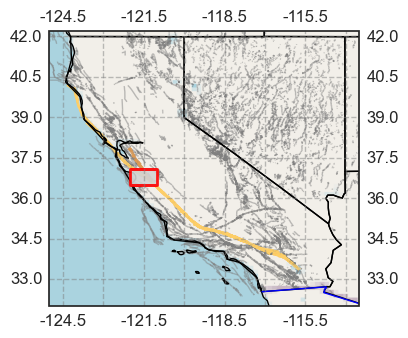

In [194]:
# Plot USA map with regions
Cali_extent = [-125.0, -108.5, 32.0, 42.2]
Cali_extent2 = [-125.0, -113.5, 32.0, 42.2]
fig = plt.figure(figsize=(4,4))
axa = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 3)  # Zoom level of 8 
axa.set_extent(Cali_extent2, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_USA.geometry, crs=ccrs.PlateCarree(), edgecolor='grey', facecolor="none",alpha=0.5)
axa.add_geometries(gdf_san_andreas.geometry, crs=ccrs.PlateCarree(), edgecolor=colours[0], facecolor="none",linewidth=2)
axa.add_geometries(gdf_calaveras.geometry, crs=ccrs.PlateCarree(), edgecolor=colours[1], facecolor="none",linewidth=2)

shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')
# Fill California with beige
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    axa.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1)


axa.coastlines(resolution='50m')
axa.add_feature(cfeature.BORDERS, edgecolor='blue', linewidth=1)
# Add Fault geometries
colours  = cmap(np.linspace(0, 1, 6))
# Define colors and labels for regions



'''regions = {
    'Hayward': {'coords': dict(left=-122.42, bottom=37.5, right=-121.92, top=38), 'color': colours[0], 'label': 'fig\n4a.'},
    'Hollister': {'coords': dict(left=-121.65, bottom=36.5, right=-121.15, top=37.0), 'color': colours[1], 'label': 'fig\n5a.'},
    'Parkfield': {'coords': dict(left=-120.65, bottom=35.55, right=-120.1, top=36.1), 'color': colours[2], 'label': 'fig\n6a.'},
    'Salton Sea': {'coords': dict(left=-117.25, bottom=32.2, right=-115.25, top=34.2), 'color': colours[3], 'label': 'fig\n7a.'},
    'Ridgecrest': {'coords': dict(left=-117.8, bottom=35.2, right=-117.2, top=35.8), 'color': colours[4], 'label': 'fig\n8a.'},
    'Utah': {'coords': dict(left=-110.25, bottom=37.75, right=-109.75, top=38.25), 'color': colours[5], 'label': 'fig\n9a.'}
}'''

regions = {'rheolgy': {'coords': dict(left=-122, bottom=36.5, right=-121, top=37.1), 'color': 'red', 'label': 'fig\n4a.'}}


label_distance = 1.3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    axa.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

    # Calculate label position
    label_y = (coords['top'] + coords['bottom']) / 2
    label_x = coords['right'] + label_distance if region != 'Salton Sea' else coords['left'] - label_distance

    # Add annotation
    '''axa.annotate(region, 
                      xy=(coords['right'] if region != 'Salton Sea' else coords['left'], label_y),
                      xytext=(label_x, label_y),
                      arrowprops=dict(facecolor=color,edgecolor=color, arrowstyle='->', lw=3),
                      bbox=dict(boxstyle='round,pad=0.3', edgecolor=color, facecolor=text_box_color),
                      fontsize=10, ha='center', va='center')'''

    # Add text inside the bounding box
    box_x_center = (coords['left'] + coords['right']) / 2
    #axa.text(box_x_center, label_y, label, fontsize=8, ha='center', va='center', color='black')

#scale_bar(axa, ccrs.PlateCarree(), 100)
gl=axa.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = mticker.FormatStrFormatter('%.1f')
gl.yformatter = mticker.FormatStrFormatter('%.1f')
#plt.savefig('../../USA_map_with_square_rheology.pdf')
plt.show()

NameError: name 'scale_bar' is not defined

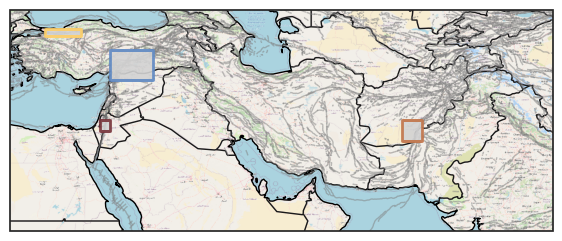

In [195]:
# Plot Asia map with regions
turkiye_extent = [26.0, 45.0, 36.0, 42.5]
asia_extent = [26.0, 80.0, 21, 43]
plt.figure(figsize=(7, 4))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
slicedCM = cmap(np.linspace(0,1,6))
# Create an instance of GoogleTiles
# google_tiles = img_tiles.GoogleTiles(style='satellite')
# Add the Google Tiles to the axis with a lower zoom level
# ax1.add_image(google_tiles, 10)
ax1.set_extent(turkiye_extent)
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()
ax1.add_image(osm, 6)  # Zoom level of 8  


extent = asia_extent
ax1.set_extent(extent, crs=ccrs.PlateCarree())
 # Add coastlines and other features if desired
ax1.coastlines(resolution='50m')
ax1.add_feature(cfeature.BORDERS, edgecolor='k', linewidth=1)


# Add Fault geometries
ax1.add_geometries(gdf_Asia.geometry, crs = ccrs.PlateCarree(),edgecolor='grey', facecolor="none",alpha=0.5)
# Define box colours
# Define colors and labels for regions
regions = {
    'North Anatolia': {'coords': dict(left=29.5, bottom=40.4, right=33.1, top=41.1), 'color': slicedCM[0], 'label': 'Fig 4a/b.'},
    'East Anatolia': {'coords': dict(left=36, bottom=36, right=40.25, top=39), 'color': slicedCM[4], 'label': 'Fig 4c.'},
    'Pakistan': {'coords': dict(left=65, bottom=30, right=67, top=32), 'color': slicedCM[1], 'label': 'Fig 5a/b.'},
    'Israel': {'coords': dict(left=35, bottom=31, right=36, top=32), 'color': slicedCM[2], 'label': 'Fig 5c.'},
}
label_distance = 3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    ax1.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

    # Calculate label position
    label_y = (coords['top'] + coords['bottom']) / 2
    label_x = coords['right'] + label_distance if region != 'Salton Sea' else coords['left'] - label_distance

    # Add annotation
    '''ax1.annotate(label, 
                      xy=(coords['right'] if region != 'Salton Sea' else coords['left'], label_y),
                      xytext=(label_x, label_y),
                      arrowprops=dict(facecolor=color,edgecolor=color, arrowstyle='->', lw=3),
                      bbox=dict(boxstyle='round,pad=0.3', edgecolor=color, facecolor=text_box_color),
                      fontsize=10, ha='center', va='center')'''

    # Add text inside the bounding box
    box_x_center = (coords['left'] + coords['right']) / 2
    #ax1.text(box_x_center, label_y, label, fontsize=11, ha='center', va='center', color='black')

scale_bar(ax1, ccrs.PlateCarree(), 1000)
gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = mticker.FormatStrFormatter('%.1f')
gl.yformatter = mticker.FormatStrFormatter('%.1f')
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/Asia_map_with_squares.pdf')
plt.show()

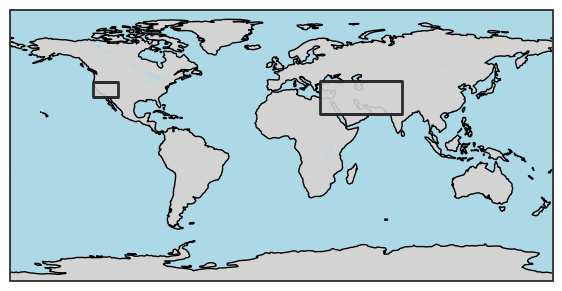

In [196]:
# Plot combined figure with world map only
fig = plt.figure(figsize=(7, 4))

# Second row: single centered plot
ax_left = plt.subplot(1,1,1, projection=ccrs.PlateCarree())


# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Load the Natural Earth data for country boundaries
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')

# Define colors and labels for regions
regions = {
    'Asia': {'coords': dict(left=26, bottom=21, right=80, top=43), 'color': 'k', 'label': 'Fig 4a/b.'},
    'USA': {'coords': dict(left=-125, bottom=32, right=-108.5, top=42.2), 'color': 'k', 'label': 'Fig 4c.'},
}
label_distance = 3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# --------------------------- Left Panel (World Map) --------------------------- #
#osm = img_tiles.OSM()
#ax_left.add_image(osm, 6)
ax_left.coastlines()
ax_left.add_feature(cfeature.LAND, facecolor='lightgrey')
ax_left.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax_left.add_feature(cfeature.LAKES, facecolor='lightblue')

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    ax_left.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

#ax_left.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
slicedCM = cmap(np.linspace(0,1,6))

'''# Highlight specific countries on the map
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Turkey':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[0], linewidth=0.5)
    elif country_name == 'Pakistan':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[1], linewidth=0.5)
    elif country_name =='Israel':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[4], linewidth=0.5)
    else:
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)'''

'''# Highlight California in the world map
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[2], linewidth=0.5)
    elif state_name == 'Utah' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[3], linewidth=0.5)
    else:
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)'''
    


#gl = ax_left.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = mticker.FormatStrFormatter('%.1f')
gl.yformatter = mticker.FormatStrFormatter('%.1f')  
ax_left.set_global()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/Creepmeter_locations_world_boxes.pdf')
plt.show()  

In [197]:
dot_location = [(PARK['Longitude'].mean(), PARK['Latitude'].mean()),
                (HOL['Longitude'].mean(), HOL['Latitude'].mean()),
                (HAY['Longitude'].mean(), HAY['Latitude'].mean()),
                (SOCAL['Longitude'].mean(), SOCAL['Latitude'].mean()),
                (RID['Longitude'].mean(), RID['Latitude'].mean()),
                (UTA['Longitude'].mean(), UTA['Latitude'].mean()),
                (NAF['Longitude'].mean(), NAF['Latitude'].mean()),
                (EAF['Longitude'].mean(), EAF['Latitude'].mean()),
                (CHAF['Longitude'].mean(), CHAF['Latitude'].mean()),
                (DSF['Longitude'].mean(), DSF['Latitude'].mean())]

#ffcf67 #c17449 #773339 #4c3d73 #5f89c3 #81e7ff


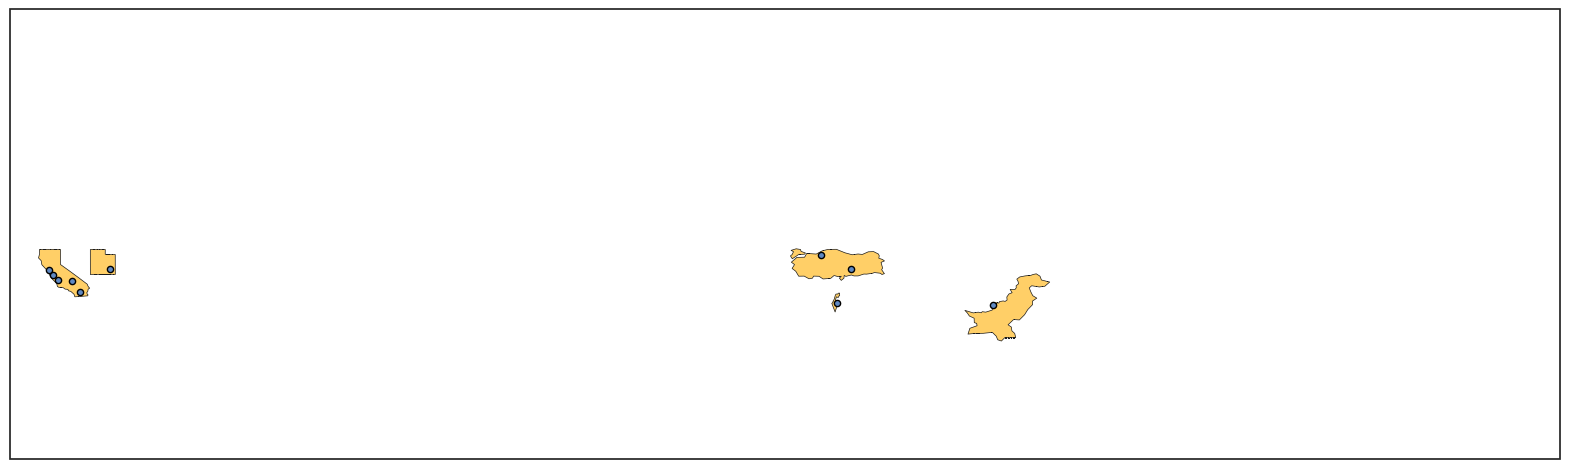

In [198]:
# Plot country outlines only

fig = plt.figure(figsize=(20, 20))

# Second row: single centered plot
ax_left = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
ax_left.set_extent([-130,180,0,90], crs=ccrs.PlateCarree())

# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Load the Natural Earth data for country boundaries
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')


# --------------------------- Left Panel (World Map) --------------------------- #
osm = img_tiles.OSM()
#ax_left.add_image(osm, 6)
#ax_left.coastlines()
#ax_left.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
slicedCM = cmap(np.linspace(0,1,6))
print(rgb2hex(slicedCM[0]),rgb2hex(slicedCM[1]),rgb2hex(slicedCM[2]),rgb2hex(slicedCM[3]),rgb2hex(slicedCM[4]),rgb2hex(slicedCM[5]))
# Highlight specific countries on the map
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Turkey':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[0], linewidth=0.5)#0
    elif country_name == 'Pakistan':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[0], linewidth=0.5)#1
    elif country_name =='Israel':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[0], linewidth=0.5)#4
    else:
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)

# Highlight California in the world map
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[0], linewidth=0.5)#2
    elif state_name == 'Utah' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[0], linewidth=0.5)#3
    else:
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)
    
plt.scatter(*zip(*dot_location), color=slicedCM[4], edgecolor='black', s=20, zorder=100, transform=ccrs.Geodetic())
#gl = ax_left.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

#ax_left.set_global()
#plt.savefig('../../Creep_catalog_stats_figures/New Plots/world_outlines.pdf')
plt.show()  

Assessing creep events through time

In [199]:
# Combine all creepmeters into a single dataframe with type column
df_surge['Event type'] = 'MLCS'
df_creeplet['Event type'] = 'CLTS'
df_ce['Event type'] = 'ECE'
df_all_types = pd.concat([df_surge,df_creeplet,df_ce])

In [200]:
# Round sampling rate to nearest integer
df_all_types['Sampling rate, s'] = round(df_all_types['Sampling rate, s'])

In [201]:
df_all

Start Time        End Time Network Creepmeter full name  \
Event_id                                                                     
0000_XMR1 1980-02-19 14:30:00   20/2/80 21:29     HOL        Melendy Ranch   
0001_XMR1 1980-02-21 06:29:00   23/2/80 08:10     HOL        Melendy Ranch   
0002_XMR1 1980-07-22 19:59:00   24/7/80 19:30     HOL        Melendy Ranch   
0003_XMR1 1980-10-09 09:09:00   12/9/80 03:29     HOL        Melendy Ranch   
0004_XMR1 1980-12-13 12:20:00  13/12/80 20:50     HOL        Melendy Ranch   
...                       ...             ...     ...                  ...   
5859_KIR1 2023-09-12 12:14:00  10/12/23 05:49     EAF             Kirikhan   
5860_WKR1 2023-12-18 17:50:00  20/12/23 20:50    PARK           Work Ranch   
5861_WKR1 2023-12-20 20:39:00  21/12/23 16:39    PARK           Work Ranch   
5862_WKR1 2023-12-21 17:19:00  22/12/23 18:40    PARK           Work Ranch   
5863_DS30 2023-12-23 04:59:00   11/1/24 06:59     DSF             Dead Sea   

          Creepmeter abbreviation  Latitude  Longitude  \
Event_id                                                 
0000_XMR1                    XMR1  36.59500 -121.18700   
0001_XMR1                    XMR1  36.59500 -121.18700   
0002_XMR1                    XMR1  36.59500 -121.18700   
0003_XMR1                    XMR1  36.59500 -121.18700   
0004_XMR1                    XMR1  36.59500 -121.18700   
...                           ...       ...        ...   
5859_KIR1                    KIR1  36.47910   36.33390   
5860_WKR1                    WKR1  35.85800 -120.39200   
5861_WKR1                    WKR1  35.85800 -120.39200   
5862_WKR1                    WKR1  35.85800 -120.39200   
5863_DS30                    DS30  31.23655   35.36525   

                                   Fault                  Event type  \
Event_id                                                               
0000_XMR1  San Andreas Fault - Hollister  Episodic Creep Event (ECE)   
0001_XMR1  San Andreas Fault - Hollister  Episodic Creep Event (ECE)   
0002_XMR1  San Andreas Fault - Hollister  Episodic Creep Event (ECE)   
0003_XMR1  San Andreas Fault - Hollister  Episodic Creep Event (ECE)   
0004_XMR1  San Andreas Fault - Hollister  Episodic Creep Event (ECE)   
...                                  ...                         ...   
5859_KIR1           East Anatolian Fault             Creeplet (CLTS)   
5860_WKR1  San Andraes Fault - Parkfield  Episodic Creep Event (ECE)   
5861_WKR1  San Andraes Fault - Parkfield  Episodic Creep Event (ECE)   
5862_WKR1  San Andraes Fault - Parkfield  Episodic Creep Event (ECE)   
5863_DS30                 Dead Sea Fault  Episodic Creep Event (ECE)   

           Sampling rate, s  Displacement, mm  Duration, hrs  \
Event_id                                                       
0000_XMR1               600          0.190000      30.999722   
0001_XMR1               600          0.282000      49.666944   
0002_XMR1               600          0.211000      47.500278   
0003_XMR1               600          1.063000      42.333333   
0004_XMR1               600          0.127000       8.500000   
...                     ...               ...            ...   
5859_KIR1                60          0.052654      17.583333   
5860_WKR1               600          0.114000      51.000000   
5861_WKR1               600          0.152000      20.000000   
5862_WKR1               600          0.162000      25.333611   
5863_DS30              3600          0.565803     458.000000   

          Potentially triggered by earthquake  \
Event_id                                        
0000_XMR1                                  No   
0001_XMR1                                  No   
0002_XMR1                                  No   
0003_XMR1                                  No   
0004_XMR1                                  No   
...                                       ...   
5859_KIR1                                  No   
5860_WKR1                             

In [202]:
df_all_types.drop_duplicates(subset=['Event_id'], inplace=True)
df_all_types

KeyError: Index(['Event_id'], dtype='object')

In [60]:
SOCAL

Unnamed: 0 Network Creepmeter_abbrv File_code  \
0          129   SOCAL             COML  COML_30T   
1           71   SOCAL             QW30   QW30_1T   
2           70   SOCAL             QE30   QE30_1T   
3           54   SOCAL             IR30   IR30_1T   
4           59   SOCAL             NS45   NS45_1T   
5           36   SOCAL             FE30  FE30_10T   
6           82   SOCAL             SC30   SC30_1T   
7           29   SOCAL             DU30   DU30_1T   
8           87   SOCAL             SH30   SH30_1T   
9          133   SOCAL             EASH   EASH_5T   
10          94   SOCAL             SU30   SU30_1T   
11          78   SOCAL             RR45   RR45_1T   
12         130   SOCAL             COLE  COLE_30T   
13         131   SOCAL             COLW   COLW_5T   

                     Start Time                     End Time  \
0   2010-08-15T00:30:00.000000Z  2011-02-03T16:55:05.000000Z   
1   2019-03-28T20:32:00.000000Z  2019-10-27T16:29:00.000000Z   
2   2018-10-29T17:11:52.000000Z  2024-03-20T14:37:52.000000Z   
3   2019-03-28T22:53:00.000000Z  2024-11-27T18:00:00.000000Z   
4   2018-12-02T17:14:06.000000Z  2022-06-15T12:51:06.000000Z   
5   2004-03-05T05:00:00.000000Z  2008-07-30T01:40:00.000000Z   
6   2019-03-29T14:33:00.000000Z  2025-01-30T03:55:00.000000Z   
7   2010-01-02T16:40:00.000000Z  2024-02-02T20:29:00.000000Z   
8   2016-12-30T19:47:39.000000Z  2019-06-12T11:59:39.000000Z   
9   2016-12-30T19:47:39.000000Z  2024-11-27T19:34:56.000000Z   
10  2019-03-30T00:48:54.000000Z  2023-10-07T02:32:54.000000Z   
11  2019-03-29T23:01:46.000000Z  2023-10-07T11:08:46.000000Z   
12  2010-08-10T07:01:56.000000Z  2011-02-20T20:31:56.000000Z   
13  2010-04-10T00:10:00.000000Z  2010-04-16T17:40:00.000000Z   

    Sampling rate, Hz Sampling rate, mins  Latitude  Longitude  Length Depth  \
0            0.000556                 30T   33.8965  -117.0866     NaN   NaN   
1            0.016667                  1T   33.6526  -116.0846     8 m   NaN   
2            0.016667                  1T   33.6473  -116.0780    10 m   NaN   
3            0.016667                  1T   33.5700  -115.9785    10 m   NaN   
4            0.016667                  1T   33.5307  -115.9388    14 m   NaN   
5            0.001667                 10T   33.4572  -115.8539     9 m   NaN   
6            0.016667                  1T   33.4485  -115.8437  12.8 m   NaN   
7            0.016667                  1T   33.4120  -115.7950    14 m   NaN   
8            0.016667                  1T   33.3713  -115.7808    13 m   NaN   
9            0.003333                  5T   33.3710  -115.7801     NaN   NaN   
10           0.016667                  1T   32.9303  -115.7009     7 m   NaN   
11           0.016667                  1T   32.7812  -115.4485    16 m   NaN   
12           0.000556                 30T   32.6643  -115.8790     NaN   NaN   
13           0.003333                  5T   32.6483  -115.8480     NaN   NaN   

    Obliquity         Creepmeter_full_name                       Fault  
0        30.0                  Mystic Lake           San Jacinto Fault  
1        30.0    W. Quarry SSA Mecca Hills  Southern San Andreas Fault  
2        30.0    E. Quarry SSA Mecca Hills  Southern San Andreas Fault  
3        30.0  Indian Ring SSA North Shore  Southern San Andreas Fault  
4        45.0  North Shore SSA North Shore  Southern San Andreas Fault  
5        30.0       Ferrum SSA Durmid Hill  Southern San Andreas Fault  
6        30.0       Salt Creek SSA oblique  Southern San Andreas Fault  
7        30.0     Pipeline SSA Durmid Hill  Southern San Andreas Fault  
8        30.0      North Shoreline oblique       North Shoreline Fault  
9        53.0        East Shoreline Normal        East Shoreline Fault  
10       30.0           Superstition Hills     Superstition HillsFault  
11       45.0          Ross Road, Imperial              Imperial Fault  
12       30.0                    Yuha East         Laguna Salada Fault  
13       30.0           

In [203]:
fault = []
for i in range(len(df_all_types)):
    bool_series = creepmeters['Creepmeter_abbrv'] == df_all_types['Creepmeter abbreviation'].iloc[i]
    fault.append(creepmeters['Fault'][bool_series].values[0])
df_all_types['Fault'] = fault

In [204]:
df_all_types.sort_values(by='Start Time',inplace=True)
df_all_types.reset_index(inplace=True,drop=True)
df_all_types.drop(columns=['Maximum velocity, m/s','Time to next event, days'],inplace=True)
df_all_types




KeyError: "['Maximum velocity, m/s', 'Time to next event, days'] not found in axis"

In [205]:
bool_mlcs = df_all_types['Event type'] == 'MLCS'
bool_clts = df_all_types['Event type'] == 'CLTS'
bool_ece = df_all_types['Event type'] == 'ECE'
df_all_types['Event type'][bool_mlcs] = 'Long-period Creep Accelerations (LPCAs)'
df_all_types['Event type'][bool_clts] = 'Creeplet (CLTS)'
df_all_types['Event type'][bool_ece] = 'Episodic Creep Event (ECE)'

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_77777/3365051068.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_all_types['Event type'][bool_mlcs] = 'Long-period Creep Accelerations (LPCAs)'
/var/folders/56/47k8q3q1449cq8k

In [ ]:
# Define the new order of columns
new_column_order = ['Event_id', 'Start Time', 'End Time','Network','Creepmeter full name','Creepmeter abbreviation',
                    'Latitude','Longitude','Fault','Event type','Sampling rate, s','Displacement, mm','Duration, hrs']

# Reorder the columns
df_reordered = df_all_types[new_column_order]
print(df_reordered.head())
# Save the reordered DataFrame to a new CSV file
#df_reordered.to_csv('../../Data/DATA_tidied/Final_Catalogue/Digital_catalogue_of_5000_aseismic_slip_events_recorded_by_creepmeters.csv', index=False)

KeyError: "['Event_id'] not in index"

In [207]:
EAF_events = df_all_types.copy(deep=True)
EAF_events.drop(EAF_events[EAF_events['Network'] != 'EAF'].index, inplace=True)
EAF_events

Start Time        End Time Network Creepmeter full name  \
4157 2017-11-17 04:38:00  17/11/17 20:16     EAF           Palu North   
4158 2017-11-17 04:38:00  17/11/17 23:22     EAF           Palu South   
4161 2017-11-22 04:49:00  24/11/17 16:40     EAF           Palu South   
4162 2017-11-22 04:49:00  24/11/17 17:14     EAF           Palu North   
4217 2018-03-24 08:25:00   24/3/18 17:25     EAF           Palu South   
...                  ...             ...     ...                  ...   
5705 2023-12-06 06:37:00   13/6/23 03:34     EAF               Goksun   
5706 2023-12-06 09:13:00   12/6/23 19:26     EAF               Goksun   
5707 2023-12-09 00:36:00   13/9/23 01:57     EAF               Goksun   
5710 2023-12-10 06:21:00  12/10/23 23:39     EAF               Goksun   
5711 2023-12-10 23:39:00  13/10/23 05:56     EAF               Goksun   

     Creepmeter abbreviation  Latitude  Longitude                 Fault  \
4157                    PAN1    38.699    39.9537  East Anatolian Fault   
4158                    PAS1    38.699    39.9537  East Anatolian Fault   
4161                    PAS1    38.699    39.9537  East Anatolian Fault   
4162                    PAN1    38.699    39.9537  East Anatolian Fault   
4217                    PAS1    38.699    39.9537  East Anatolian Fault   
...                      ...       ...        ...                   ...   
5705                    GOK1    38.006    36.5267  East Anatolian Fault   
5706                    GOK1    38.006    36.5267  East Anatolian Fault   
5707                    GOK1    38.006    36.5267  East Anatolian Fault   
5710                    GOK1    38.006    36.5267  East Anatolian Fault   
5711                    GOK1    38.006    36.5267  East Anatolian Fault   

                      Event type  Sampling rate, s  Displacement, mm  \
4157  Episodic Creep Event (ECE)                60          1.847290   
4158  Episodic Creep Event (ECE)                60          1.849830   
4161             Creeplet (CLTS)                60          0.057620   
4162             Creeplet (CLTS)                60          0.057620   
4217             Creeplet (CLTS)               300          0.049999   
...                          ...               ...               ...   
5705  Episodic Creep Event (ECE)                60          0.167316   
5706  Episodic Creep Event (ECE)                60          0.136601   
5707  Episodic Creep Event (ECE)                60          0.208539   
5710             Creeplet (CLTS)                60          0.094916   
5711             Creeplet (CLTS)                60          0.039953   

      Duration, hrs Potentially triggered by earthquake  \
4157      15.633333                                  No   
4158      18.733333                                  No   
4161      59.850000                                  No   
4162      60.416667                                  No   
4217       9.000000                                  No   
...             ...                                 ...   
5705      20.950000                                  No   
5706      10.216667                                  No   
5707      25.350000                                  No   
5710      17.300000                                  No   
5711       6.283333                                  No   

     Details of potential earthquake trigger  
4157                                          
4158                                          
4161                                          
4162                                          
4217                                          
...                                      ...  
5705                                          
5706                                          
5707                                          
5710                                          
5711                                          

[328 rows x 14 columns]

In [217]:
EAF_events_CE = EAF_events.copy(deep=True)
EAF_events_CE.drop(EAF_events_CE[EAF_events_CE['Event type'] != 'Creeplet (CLTS)'].index, inplace=True)
len(EAF_events_CE)/len(EAF_events)*100

62.80487804878049

In [215]:
EAF_events_CE

Start Time        End Time Network Creepmeter full name  \
4161 2017-11-22 04:49:00  24/11/17 16:40     EAF           Palu South   
4162 2017-11-22 04:49:00  24/11/17 17:14     EAF           Palu North   
4217 2018-03-24 08:25:00   24/3/18 17:25     EAF           Palu South   
4343 2018-12-24 23:44:00  27/12/18 19:59     EAF           Palu South   
4507 2019-11-10 10:34:00  17/10/19 12:49     EAF           Palu South   
...                  ...             ...     ...                  ...   
5693 2023-11-19 03:54:00  19/11/23 20:51     EAF             Kirikhan   
5694 2023-11-19 07:04:00  20/11/23 00:08     EAF          Yazica West   
5698 2023-11-26 08:36:00  27/11/23 19:48     EAF          Yazica West   
5710 2023-12-10 06:21:00  12/10/23 23:39     EAF               Goksun   
5711 2023-12-10 23:39:00  13/10/23 05:56     EAF               Goksun   

     Creepmeter abbreviation  Latitude  Longitude                 Fault  \
4161                    PAS1   38.6990    39.9537  East Anatolian Fault   
4162                    PAN1   38.6990    39.9537  East Anatolian Fault   
4217                    PAS1   38.6990    39.9537  East Anatolian Fault   
4343                    PAS1   38.6990    39.9537  East Anatolian Fault   
4507                    PAS1   38.6990    39.9537  East Anatolian Fault   
...                      ...       ...        ...                   ...   
5693                    KIR1   36.4791    36.3339  East Anatolian Fault   
5694                    YZW1   38.1086    38.7361  East Anatolian Fault   
5698                    YZW1   38.1086    38.7361  East Anatolian Fault   
5710                    GOK1   38.0060    36.5267  East Anatolian Fault   
5711                    GOK1   38.0060    36.5267  East Anatolian Fault   

           Event type  Sampling rate, s  Displacement, mm  Duration, hrs  \
4161  Creeplet (CLTS)                60          0.057620      59.850000   
4162  Creeplet (CLTS)                60          0.057620      60.416667   
4217  Creeplet (CLTS)               300          0.049999       9.000000   
4343  Creeplet (CLTS)               300          0.042955      68.250000   
4507  Creeplet (CLTS)               300          0.077942     146.250278   
...               ...               ...               ...            ...   
5693  Creeplet (CLTS)                60          0.028521      16.950000   
5694  Creeplet (CLTS)                60          0.063114      17.066667   
5698  Creeplet (CLTS)                60          0.048099      35.200000   
5710  Creeplet (CLTS)                60          0.094916      17.300000   
5711  Creeplet (CLTS)                60          0.039953       6.283333   

     Potentially triggered by earthquake  \
4161                                  No   
4162                                  No   
4217                                  No   
4343                                  No   
4507                                  No   
...                                  ...   
5693                                  No   
5694                                  No   
5698                                  No   
5710                                  No   
5711                                  No   

     Details of potential earthquake trigger  
4161                                          
4162                                          
4217                                          
4343                                          
4507                                          
...                                      ...  
5693                                          
5694                                          
5698                                          
5710                                          
5711                                          

[206 rows x 14 columns]

In [ ]:
# Define a colormap
colours  = cmap(np.linspace(0, 1, 11))

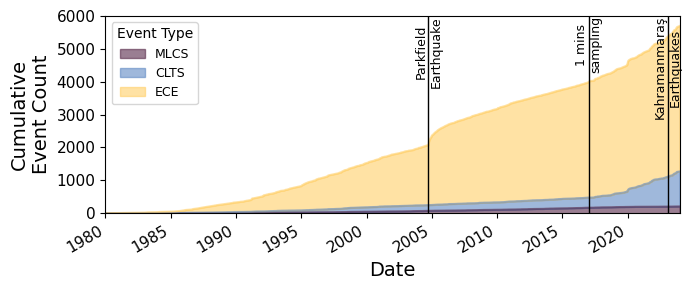

In [ ]:
# Plot cumulative event count over time by type
plt.figure(figsize=(7,3))
ax = plt.subplot(1, 1, 1)
# Group by date and type
grouped = df_all_types.groupby([pd.Grouper(key='Start Time', freq='D'), 'Event type']).size().unstack(fill_value=0)

# Cumulative sum
cumulative = grouped.cumsum()

# Sort columns by total count (smallest to largest → largest on top)
sorted_cols = cumulative.iloc[-1].sort_values(ascending=True).index
cumulative_sorted = cumulative[sorted_cols]

# Plot
cumulative_sorted.plot(kind='area', stacked=True, ax=ax,
                       color=[colours[i] for i in [5, 8, 0]],alpha=0.6)  # Match colour to order if needed
ax.set_ylabel("Cumulative\nEvent Count",fontsize=14)
ax.set_xlabel("Date",fontsize=14)
ax.set_xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
ax.set_ylim([0,6000])
#plt.vlines([dt.datetime(2004,9,28,17,15,24)],colors=['k'],ymin=0,ymax=6000,linewidth=3)

ax.vlines([dt.datetime(2004,9,28,17,15,24),dt.datetime(2017,1,1,0,0,0),dt.datetime(2023,2,6)],colors=['k','k','k'],ymin=0,ymax=6000,linewidth=1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
legend = plt.legend(fontsize=9,title='Event Type')
legend.get_title().set_fontsize(10)
plt.tight_layout()
plt.text(dt.datetime(2004,9,28,17,15,24),6000,'Parkfield\nEarthquake',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.text(dt.datetime(2017,1,1,0,0,0),6000,'1 mins\nsampling',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.text(dt.datetime(2023,2,6),6000,'Kahramanmaraş\nEarthquakes',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)

plt.savefig('../../Creep_catalog_stats_figures/New Plots/event_v_surge_v_creeplet.pdf')
plt.show()

In [ ]:
# Load creepmeter lifetimes data
creepmeter_lifetimes = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv',index_col=0)
creepmeter_lifetimes['Start Time'] = pd.to_datetime(creepmeter_lifetimes['Start Time'])

In [ ]:
# Convert sampling rate to minutes
reversed_frequency_dict = {
    '1S': 1/60,    # 1 second
    '10S': 1/6,    # 10 seconds
    '30S': 1/2,    # 30 seconds
    '1T': 1,       # 1 minute
    '2T': 2,       # 2 minutes
    '5T': 5,       # 5 minutes
    '10T': 10,     # 10 minutes
    '15T': 15,     # 15 minutes
    '30T': 30,     # 30 minutes
    '60T': 60      # 60 minutes
}
creepmeter_lifetimes['Sampling rate, mins_number'] = round(creepmeter_lifetimes['Sampling rate, mins'].map(reversed_frequency_dict),2)
min_samples = creepmeter_lifetimes.copy(deep=True)
min_samples.drop(min_samples[min_samples['Sampling rate, mins_number']>1].index,inplace=True)

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/763798419.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  creep['Sampling rate, mins'] = pd.to_timedelta(creep['Sampling rate, mins'])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/763798419.py:7: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  creep['Sampling rate, mins'] = pd.to_timedelta(creep['Sampling rate, mins'])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/763798419.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=creep['Start Time'].min().floor('D'),
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/763798419.py:30: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  active_by_rate = activ

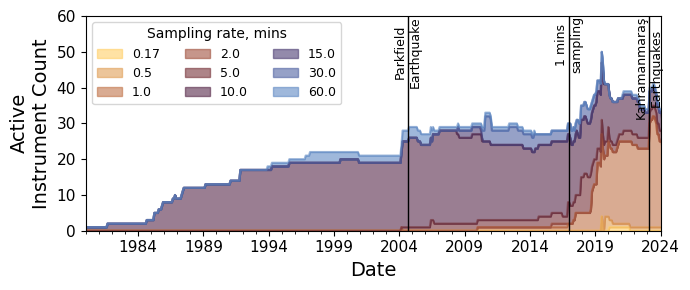

In [73]:
# Assume your df has: Start Time, End Time, Sampling rate, mins
creep = creepmeter_lifetimes.copy()
creep['End Time'] = pd.to_datetime(creep['End Time'])
creep['Start Time'] = pd.to_datetime(creep['Start Time'])

# Convert sampling rate strings (like "1T", "10T", "10S") to Timedelta objects
creep['Sampling rate, mins'] = pd.to_timedelta(creep['Sampling rate, mins'])

# Convert timedelta to minutes (float)
creep['Sampling rate, mins'] = round(creep['Sampling rate, mins'].dt.total_seconds()/60,2)

# Create daily date range
date_range = pd.date_range(start=creep['Start Time'].min().floor('D'), 
                           end=creep['End Time'].max().ceil('D'), freq='M')

# Create empty DataFrame with dates as index
active_matrix = pd.DataFrame(0, index=date_range, columns=creep.index)

# Fill matrix: mark instrument as active on each day it's alive
for idx, row in creep.iterrows():
    active_matrix.loc[row['Start Time'].floor('D'):row['End Time'].ceil('D'), idx] = 1

# Add sampling rate info
sampling_rate = creep['Sampling rate, mins']

# Replace columns with corresponding sampling rate
active_matrix.columns = sampling_rate

# Now group by sampling rate
active_by_rate = active_matrix.groupby(axis=1, level=0).sum()

# Plot
plt.figure(figsize=(7, 3))
ax = plt.subplot(1, 1, 1)
active_by_rate.plot(kind='area', stacked=True, ax=ax, color=colours,alpha=0.6)
plt.ylabel("Active\nInstrument Count", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
legend = plt.legend(fontsize=9, title="Sampling rate, mins",ncol=3)
legend.get_title().set_fontsize(10)
plt.tight_layout()

# Annotations
'''plt.vlines([dt.datetime(2004,1,1), dt.datetime(2017,11,1),dt.datetime(2023,2,1)],colors=['k', 'grey','lightgrey'], ymin=0, ymax=50, linewidth=3)
plt.text(dt.datetime(2004,1,1), 50,'Southern\nCalifornia', rotation=90, va='top', ha='center', fontsize=14)
plt.text(dt.datetime(2017,11,1), 50, 'North\nAnatolia', rotation=90, va='top', ha='center', fontsize=14)
plt.text(dt.datetime(2023,2,1), 50, 'East\nAnatolia', rotation=90, va='top', ha='center', fontsize=14)'''
plt.vlines([dt.datetime(2004,9,28,17,15,24),dt.datetime(2017,1,1,0,0,0),dt.datetime(2023,2,6)],colors=['k','k','k'],ymin=0,ymax=150,linewidth=1)
plt.text(dt.datetime(2004,9,28,17,15,24),60,'Parkfield\nEarthquake',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.text(dt.datetime(2017,1,1,0,0,0),60,'1 mins\nsampling',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.text(dt.datetime(2023,2,6),60,'Kahramanmaraş\nEarthquakes',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.ylim([0,60])
plt.tight_layout()

plt.savefig('../../Creep_catalog_stats_figures/New Plots/Sampling_freqs_through_time_active.pdf')
#plt.savefig('../../Creep_catalog_stats_figures/Sampling_freqs_through_time_corrected.pdf')
plt.show()


Taxonomy Figures

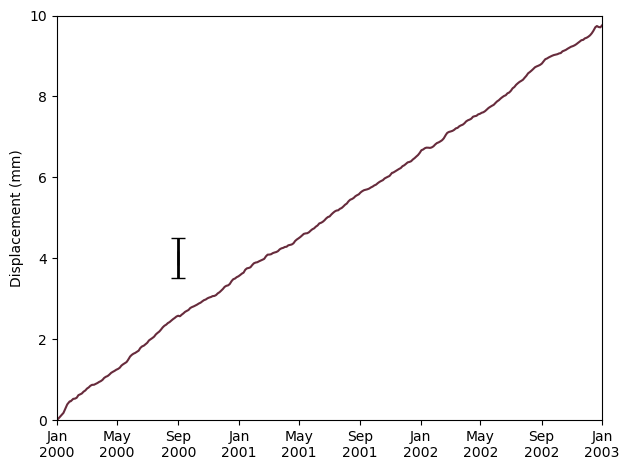

In [ ]:
# Plot example CTM1 data
with h5py.File('../../Data/DATA_tidied/HDF5/CTM1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['CTM1_60.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2000, 1, 1)) & (decoded_time <= dt.datetime(2003, 1, 1))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
            plt.ylabel('Displacement (mm)')
            plt.ylim([0,10])
            plt.xlim([dt.datetime(2000, 1, 1), dt.datetime(2003, 1, 1)])
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/Background_CTM1.pdf')
            plt.show()

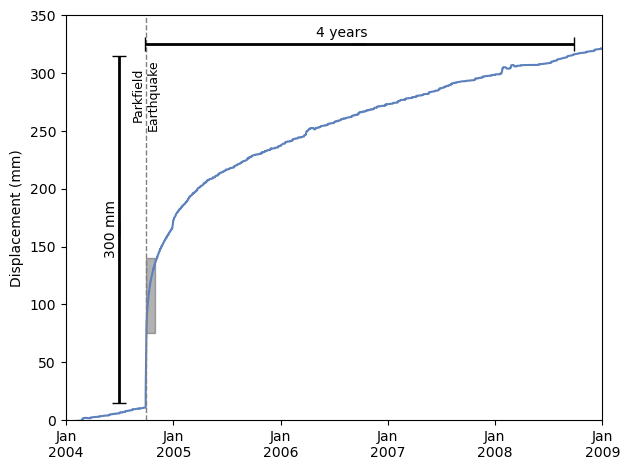

In [61]:
# Plot example XMM1 data
with h5py.File('../../Data/DATA_tidied/HDF5/XMM1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['XMM1_10.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2004, 1, 1)) & (decoded_time <= dt.datetime(2009, 1, 1))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]


            # define start and end times
            t1 = dt.datetime(2004, 10, 1)
            t2 = dt.datetime(2004, 11, 1)

            # convert to matplotlib date numbers
            x0 = mdates.date2num(t1)
            width = mdates.date2num(t2) - mdates.date2num(t1)

            # y-range
            y0, y1 = 75, 140
            height = y1 - y0

            # create rectangle
            rect = Rectangle((x0, y0), width, height, color='black', alpha=0.3)

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            ax.add_patch(rect)
            plt.plot(decoded_time, slip,color = colours[7],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
            plt.ylabel('Displacement (mm)')
            plt.vlines([dt.datetime(2004,9,28,17,15,24)],colors='grey',ymin=0,ymax=350,linewidth=1,linestyle='--')
            plt.text(dt.datetime(2004,9,28,17,15,24),250,'Parkfield\nEarthquake',rotation=90,verticalalignment='bottom',horizontalalignment='center',fontsize=9)
            plt.ylim([0,350])
            plt.xlim([dt.datetime(2004, 1, 1), dt.datetime(2009, 1, 1)])
            ax.errorbar(dt.datetime(2004,7,1), 165, xerr=dt.timedelta(days=0), yerr=150, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2004,6,1), 165, '300 mm',fontsize=10, ha='center', va='center',rotation=90)
            ax.errorbar(dt.datetime(2006,9,27), 325, xerr=dt.timedelta(days=365*2), yerr=0, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2006,7,27), 335, '4 years',fontsize=10, ha='center', va='center')
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/afterslip_XMM1.pdf')
            plt.show()

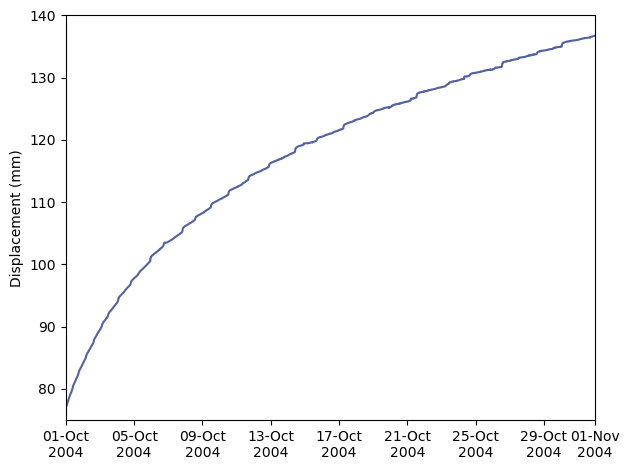

In [ ]:
# Plot zoomed in example XMM1 data
with h5py.File('../../Data/DATA_tidied/HDF5/XMM1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['XMM1_10.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2004, 1, 1)) & (decoded_time <= dt.datetime(2009, 1, 1))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[7],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b\n%Y'))
            plt.ylabel('Displacement (mm)')
            plt.vlines([dt.datetime(2004,9,28,17,15,24)],colors=colours[2],ymin=0,ymax=350,linewidth=1)
            #plt.text(dt.datetime(2004,9,28,17,15,24),250,'Parkfield\nEarthquake',rotation=90,verticalalignment='bottom',horizontalalignment='center',fontsize=9)
            plt.ylim([75,140])
            plt.xlim([dt.datetime(2004, 10, 1), dt.datetime(2004, 11, 1)])
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/afterslip_XMM1_zoom.pdf')
            plt.show()

In [216]:
# Plot zoomed in example XMM1 data
with h5py.File('../../Data/DATA_tidied/HDF5/IR30.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['IR30_1.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2021,3,29,4,33,50)) & (decoded_time <= dt.datetime(2021,3,31,17,4,50))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]
            print(slip[-1]-slip[0],(decoded_time[-1]-decoded_time[0])/dt.timedelta(hours=1))

            

0.010499999999999954 60.516666666666666


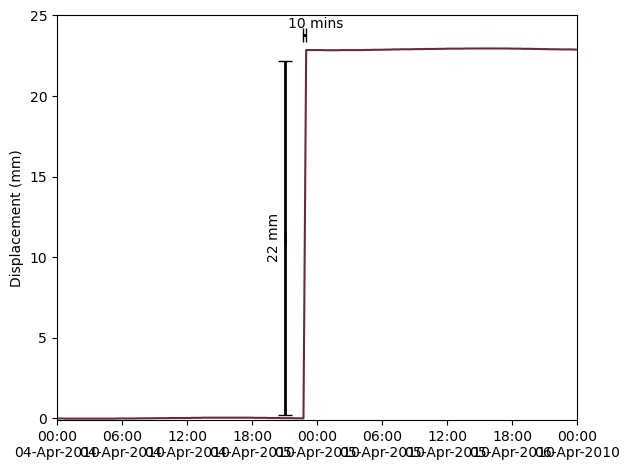

In [108]:
# Plot example SU30 data
with h5py.File('../../Data/DATA_tidied/HDF5/SU30.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['SU30_15.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2010, 4, 4)) & (decoded_time <= dt.datetime(2010, 4, 6))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d-%b-%Y'))
            plt.ylabel('Displacement (mm)')
            plt.xlim([dt.datetime(2010, 4, 4), dt.datetime(2010, 4, 6)])
            plt.ylim([-0.1,25])
            plt.tight_layout()
            ax.errorbar(dt.datetime(2010,4,4,21), 11.2, xerr=dt.timedelta(days=0), yerr=11, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2010,4,4,20), 11.2, '22 mm',fontsize=10, ha='center', va='center',rotation=90)
            ax.errorbar(dt.datetime(2010,4,4,22,50), 23.8, xerr=dt.timedelta(minutes=10), color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2010,4,4,23,50), 24.5, '10 mins',fontsize=10, ha='center', va='center')
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/triggeredslip_SU30.pdf')
            plt.show()

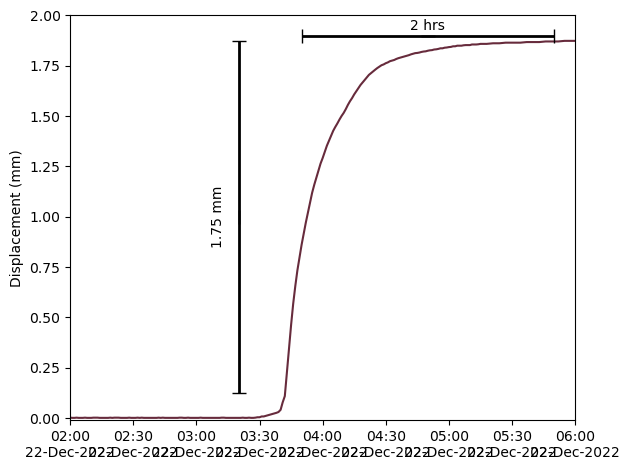

In [88]:
# Plot example XMR1 data
with h5py.File('../../Data/DATA_tidied/HDF5/XMR1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['XMR1_1.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2022,12,22)) & (decoded_time <= dt.datetime(2022, 12, 23))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d-%b-%Y'))
            plt.ylabel('Displacement (mm)')
            #plt.vlines([dt.datetime(2022,12,22,3,27,00)],colors=colours[2],ymin=-5,ymax=15,linewidth=1)
            plt.xlim([dt.datetime(2022,12,22,2), dt.datetime(2022, 12, 22,6, 0,0)])
            plt.ylim([-0.01,2])
            #plt.text(dt.datetime(2022,12,22,3,27,00),1.5,'ECE\nOnset',rotation=90,verticalalignment='bottom',horizontalalignment='center',fontsize=9)
            ax.errorbar(dt.datetime(2022,12,22,3,20), 1, xerr=dt.timedelta(days=0), yerr=0.875, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2022,12,22,3,10), 1, '1.75 mm',fontsize=10, ha='center', va='center',rotation=90)  
            ax.errorbar(dt.datetime(2022,12,22,4,50), 1.9, xerr=dt.timedelta(hours=1), yerr=0, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2022,12,22,4,50), 1.95, '2 hrs',fontsize=10, ha='center', va='center')          
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/ECE_XMR1.pdf')
            plt.show()

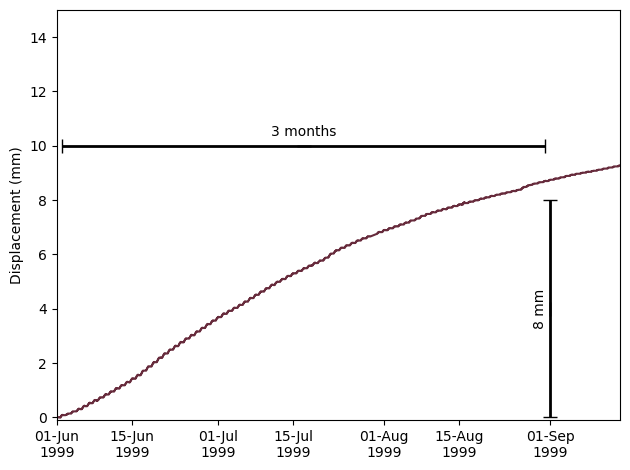

In [94]:
# Plot example XVA1 data
with h5py.File('../../Data/DATA_tidied/HDF5/XVA1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['XVA1_10.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)
	#1999-06-03 15:00:00	1999-09-12 16:20:00	
            bool_mask = (decoded_time >= dt.datetime(1999,6,1)) & (decoded_time <= dt.datetime(1999, 9, 15))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b\n%Y'))
            plt.ylabel('Displacement (mm)')
            plt.xlim([dt.datetime(1999,6,1), dt.datetime(1999, 9, 14)])
            plt.ylim([-0.1,15])
            ax.errorbar(dt.datetime(1999,9,1,), 4, xerr=dt.timedelta(days=0), yerr=4, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(1999,8,30), 4, '8 mm',fontsize=10, ha='center', va='center',rotation=90)
            plt.tight_layout()
            ax.errorbar(dt.datetime(1999,7,17), 10, xerr=dt.timedelta(days=45), yerr=0, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(1999,7,17), 10.5, '3 months',fontsize=10, ha='center', va='center')
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/MLCS_XVA1.pdf')
            plt.show()

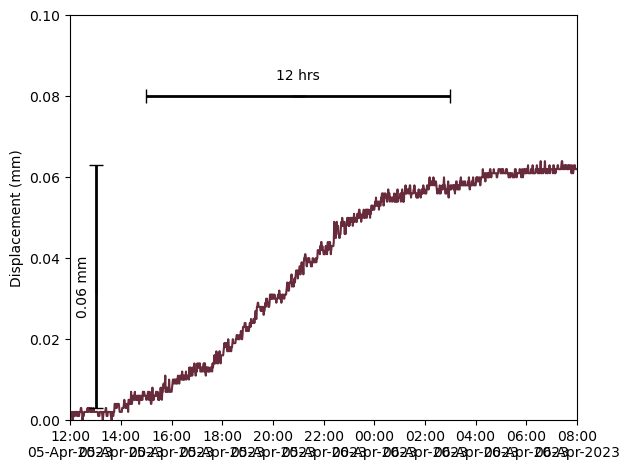

In [101]:
# Plot example CWN1 data
with h5py.File('../../Data/DATA_tidied/HDF5/CWN1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['CWN1_1.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)
	#1999-06-03 15:00:00	1999-09-12 16:20:00	
            bool_mask = (decoded_time >= dt.datetime(2023,4,5,12)) & (decoded_time <= dt.datetime(2023, 4, 6,8))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d-%b-%Y'))
            plt.ylabel('Displacement (mm)')
            plt.xlim([dt.datetime(2023,4,5,12), dt.datetime(2023, 4, 6,8)])
            plt.ylim([0,0.1])
            plt.tight_layout()
            ax.errorbar(dt.datetime(2023,4,5,13), 0.033, xerr=dt.timedelta(days=0), yerr=0.03, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2023,4,5,12,30), 0.033, '0.06 mm',fontsize=10, ha='center', va='center',rotation=90)
            ax.errorbar(dt.datetime(2023,4,5,21), 0.08, xerr=dt.timedelta(hours=6), yerr=0, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2023,4,5,21), 0.085, '12 hrs',fontsize=10, ha='center', va='center')
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/CLTS_CWN1.pdf')
            plt.show()

Comparing the number of events before and after the 2004 Parkfield earthquake

In [ ]:
# Some basic stats on Parkfield events
boolarr_cali = np.logical_or.reduce((df_all['Network']=='HOL',df_all['Network']=='HAY',df_all['Network']=='CAL',df_all['Network']=='SOCAL',df_all['Network']=='PARK'))
df_all_cali = df_all[boolarr_cali]
print('Cali events',len(df_all_cali))

boolarr_park = df_all_cali['Network']=='PARK'
df_all_park = df_all_cali[boolarr_park]
print('Parkfield events',len(df_all_park))
df_all_park.drop(df_all_park[df_all_park['Creepmeter abbreviation']=='C461'].index,inplace=True)

Parkfield_eq = dt.datetime(2004,9,28,17,15,24)
Elazig_eq = dt.datetime(2020,1,24,17,55,15)

boolarr = np.logical_and(df_all_park['Start Time']>=Parkfield_eq,df_all_park['Start Time']<=Parkfield_eq+dt.timedelta(days=100))
print('percentage of events in 100 days after parkfield',len(df_all_park[boolarr])/len(df_all)*100,len(df_all_park[boolarr]))

boolarr_100_b = np.logical_and(df_all_park['Start Time']<=dt.datetime(2004,9,28,17,15,24),df_all_park['Start Time']>=Parkfield_eq-dt.timedelta(days=100))
print('percentage of events in 100 days before parkfield',len(df_all_park[boolarr_100_b])/len(df_all)*100,len(df_all_park[boolarr_100_b]))

print((len(df_all_park[boolarr])-len(df_all_park[boolarr_100_b]))/len(df_all_park[boolarr_100_b])*100)

boolarr_pre_parkfield = df_all['Start Time']<dt.datetime(2004,9,28,17,15,24)
print('percentage of events pre parkfield',len(df_all_park[boolarr])/len(df_all[boolarr_pre_parkfield])*100)




Cali events 4918
Parkfield events 3079
percentage of events in 100 days after parkfield 4.7585601404741 271
percentage of events in 100 days before parkfield 0.24582967515364354 14
1835.7142857142858
percentage of events pre parkfield 13.091787439613526
SIV1 events 112


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_29619/3327549421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_park.drop(df_all_park[df_all_park['Creepmeter abbreviation']=='C461'].index,inplace=True)


In [ ]:
# Number of events in California networks
print('number of events in California:', 
      len(df_all[df_all['Network'] == 'HOL']) + 
      len(df_all[df_all['Network'] == 'HAY']) + 
      len(df_all[df_all['Network'] == 'PARK']) + 
      len(df_all[df_all['Network'] == 'SOCAL']) + 
      len(df_all[df_all['Network'] == 'RID']) + 
      len(df_all[df_all['Network'] == 'CAL']))

# Number of events in Utah
print('number of events in Utah:', len(df_all[df_all['Network'] == 'UTA']))

# Number of events specifically in SOCAL
print('number of events in SoCal', len(df_all[df_all['Network'] == 'SOCAL']))

# Percentage of events recorded at XMM1 instrument
print('percentage of events at XMM1', 
      (len(df_all[df_all['Creepmeter abbreviation'] == 'XMM1']) / len(df_all)) * 100)


number of events in California: 4919
number of events in Utah: 6
number of events in SoCal 230
percentage of events at XMM1 18.33187006145742


In [ ]:
# Percentage change in events pre- and post- parkfield
days = 365
before =[]
after = []
xmeter = []
for i in range(len(PARK)):
    abbrv = PARK['Creepmeter_abbrv'].iloc[i]
    if abbrv == 'XPK1':
        events = df_all_park[df_all_park['Creepmeter abbreviation']==abbrv]
        events_post = df_all_park[df_all_park['Creepmeter abbreviation']=='XPK2']
        events = pd.concat([events,events_post])
    elif abbrv in ['XPK2','XRSW','XHSW','C461','C462']:
        continue
    else:
        events = df_all_park[df_all_park['Creepmeter abbreviation']==abbrv]
    boolarr = np.logical_and(events['Start Time']>=Parkfield_eq,events['Start Time']<=Parkfield_eq+dt.timedelta(days=days))
    after_no = np.array([len(events[boolarr])])
    boolarr_100_b = np.logical_and(events['Start Time']<=dt.datetime(2004,9,28,17,15,24),events['Start Time']>=Parkfield_eq-dt.timedelta(days=days))
    before_no = np.array([len(events[boolarr_100_b])])
    print((after_no-before_no)/before_no*100,abbrv)
    xmeter.append(abbrv)
    after.append(len(events[boolarr]))
    before.append(len(events[boolarr_100_b]))



[-16.66666667] XSC1
[302.7027027] XMM1
[1480.] XMD1
[1625.] XVA1
[1166.66666667] XPK1
[580.] XTA1
[1300.] WKR1
[500.] CRR1
[inf] XGH1
[900.] X461


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_1684/2930865302.py:19: RuntimeWarning: divide by zero encountered in divide
  print((after_no-before_no)/before_no*100,abbrv)


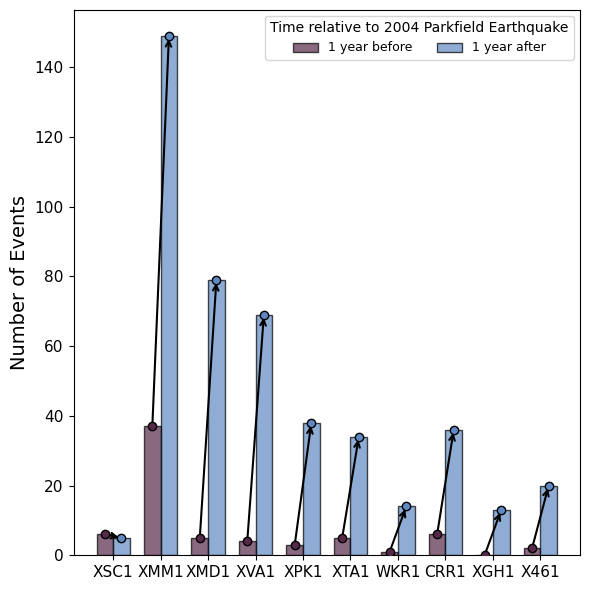

In [ ]:
# Bar plot comparing before and after event counts for each creepmeter
x = np.arange(len(xmeter))  # positions for groups
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(6, 6))

# Plot side-by-side bars
ax.bar(x - width/2, before, width, label="1 year before",color=colours[5],edgecolor='k',alpha=0.7)
ax.bar(x + width/2, after, width, label="1 year after",color=colours[8],edgecolor='k',alpha=0.7)

# Labels and formatting
ax.set_ylabel("Number of Events",fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(xmeter)
ax.legend()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
legend = plt.legend(fontsize=9, title="Time relative to 2004 Parkfield Earthquake",ncol=2)
legend.get_title().set_fontsize(10)

before_x = x - width/2
after_x = x + width/2
ax.scatter(before_x, before,color=colours[5],edgecolor='k', zorder=5)
ax.scatter(after_x, after, color=colours[8],edgecolor='k', zorder=5)

# Add arrows from before to after
for bx, by, axx, ay in zip(before_x, before, after_x, after):
    ax.annotate(
        "", 
        xy=(axx, ay), xycoords="data",
        xytext=(bx, by), textcoords="data",
        arrowprops=dict(arrowstyle="->", color="black", lw=1.5)
    )


plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Parkfield_event_rate_comparison_parkfield.pdf')
plt.show()

In [ ]:
# Some basic stats on northern events compared to parkfield
boolarr_hol = df_all_cali['Network']=='HOL'
df_all_hol = df_all_cali[boolarr_hol]
print('Parkfield events',len(df_all_hol))

Parkfield_eq = dt.datetime(2004,9,28,17,15,24)

boolarr = np.logical_and(df_all_hol['Start Time']>=Parkfield_eq,df_all_hol['Start Time']<=Parkfield_eq+dt.timedelta(days=100))
print('percentage of events in 100 days after parkfield',len(df_all_hol[boolarr])/len(df_all)*100,len(df_all_hol[boolarr]))

boolarr_100_b = np.logical_and(df_all_hol['Start Time']<=dt.datetime(2004,9,28,17,15,24),df_all_hol['Start Time']>=Parkfield_eq-dt.timedelta(days=100))
print('percentage of events in 100 days before parkfield',len(df_all_hol[boolarr_100_b])/len(df_all)*100,len(df_all_hol[boolarr_100_b]))

print((len(df_all_hol[boolarr])-len(df_all_hol[boolarr_100_b]))/len(df_all_hol[boolarr_100_b])*100)




Parkfield events 1080
percentage of events in 100 days after parkfield 0.21071115013169445 12
percentage of events in 100 days before parkfield 0.24582967515364354 14
-14.285714285714285


In [ ]:
# Percentage change in events pre- and post- parkfield for HOL network
before_hol =[]
after_hol = []
xmeter_hol = []
for i in range(len(HOL)):
    days = 365
    abbrv = HOL['Creepmeter_abbrv'].iloc[i]
    if abbrv == 'XHR2':
        events = df_all_hol[df_all_hol['Creepmeter abbreviation']==abbrv]
        events_post = df_all_hol[df_all_hol['Creepmeter abbreviation']=='XHR3']
        events = pd.concat([events,events_post])
        days = ((pd.to_datetime(creepmeter_lifetimes[creepmeter_lifetimes['Creepmeter_abbrv']=='XHR2']['End Time']) - dt.datetime(2004,9,28,17,15,24, tzinfo=dt.timezone.utc))/dt.timedelta(days=1)).iloc[0]
    elif abbrv in ['XHR3','XSH1','XSJ3','XHR1','CWC3','FCR1']:
        continue
    else:
        events = df_all_hol[df_all_hol['Creepmeter abbreviation']==abbrv]


    boolarr = np.logical_and(events['Start Time']>=Parkfield_eq,events['Start Time']<=Parkfield_eq+dt.timedelta(days=days))
    after_no = np.array([len(events[boolarr])])
    boolarr_100_b = np.logical_and(events['Start Time']<=dt.datetime(2004,9,28,17,15,24),events['Start Time']>=Parkfield_eq-dt.timedelta(days=days))
    before_no = np.array([len(events[boolarr_100_b])])
    print((after_no-before_no)/before_no*100,abbrv)

    xmeter_hol.append(abbrv)
    after_hol.append(len(events[boolarr]))
    before_hol.append(len(events[boolarr_100_b]))



[100.] SJN1
[-44.44444444] XSJ2
[50.] XHR2
[400.] CWN1
[-41.66666667] XMR1


In [131]:
# Bar plot comparing before and after event counts for each creepmeter
x = np.arange(len(xmeter_hol))  # positions for groups
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(6, 6))

# Plot side-by-side bars
ax.bar(x - width/2, before_hol, width, label="1 year before",color=colours[5],edgecolor='k',alpha=0.7)
ax.bar(x + width/2, after_hol, width, label="1 year after",color=colours[8],edgecolor='k',alpha=0.7)

# Labels and formatting
ax.set_ylabel("Number of Events",fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(xmeter_hol)
ax.legend()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
legend = plt.legend(fontsize=9, title="Time relative to 2004 Parkfield Earthquake",ncol=2)
legend.get_title().set_fontsize(10)

before_x = x - width/2
after_x = x + width/2
ax.scatter(before_x, before_hol,color=colours[5],edgecolor='k', zorder=5)
ax.scatter(after_x, after_hol, color=colours[8],edgecolor='k', zorder=5)

# Add arrows from before to after
for bx, by, axx, ay in zip(before_x, before_hol, after_x, after_hol):
    ax.annotate(
        "", 
        xy=(axx, ay), xycoords="data",
        xytext=(bx, by), textcoords="data",
        arrowprops=dict(arrowstyle="->", color="black", lw=1.5)
    )

plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Parkfield_event_rate_comparison_hol.pdf')
plt.show()

NameError: name 'xmeter_hol' is not defined

['IR30_combined', 'Temperature']
<Attributes of HDF5 object at 6093264416>
2024-11-27 17:59:44


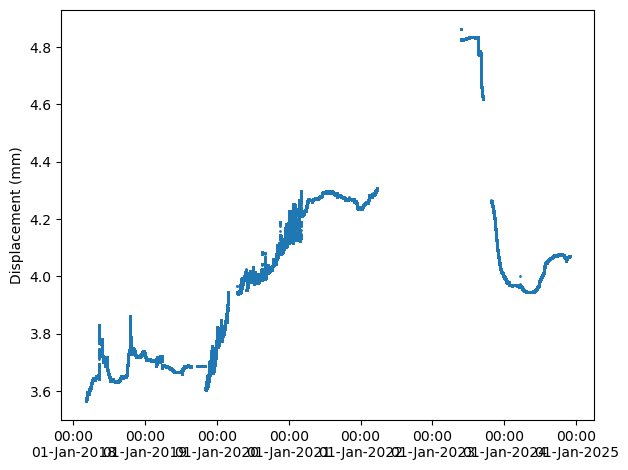

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import matplotlib.dates as mdates

# Plot example XMR1 data
with h5py.File('../../Data/DATA_tidied/HDF5/Standardised_creepmeter_data/IR30_standardised.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    print(keys)
    print(f.attrs)
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['IR30_combined']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)
            print(decoded_time[-1])
            obliquity = f.attrs['obliquity']
            slip = slip/np.cos(np.radians(obliquity))
            '''bool_mask = (decoded_time >= dt.datetime(2022,12,22)) & (decoded_time <= dt.datetime(2022, 12, 23))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]'''

            plt.Figure(figsize=(10, 6))
            ax = plt.subplot(1, 1, 1)
            plt.scatter(decoded_time, slip,s=1)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d-%b-%Y'))
            plt.ylabel('Displacement (mm)')
            #plt.vlines([dt.datetime(2022,12,22,3,27,00)],colors=colours[2],ymin=-5,ymax=15,linewidth=1)
            '''plt.xlim([dt.datetime(2022,12,22,2), dt.datetime(2022, 12, 22,6, 0,0)])
            plt.ylim([-0.01,2])'''
            #plt.text(dt.datetime(2022,12,22,3,27,00),1.5,'ECE\nOnset',rotation=90,verticalalignment='bottom',horizontalalignment='center',fontsize=9)
            '''ax.errorbar(dt.datetime(2022,12,22,3,20), 1, xerr=dt.timedelta(days=0), yerr=0.875, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2022,12,22,3,10), 1, '1.75 mm',fontsize=10, ha='center', va='center',rotation=90)  
            ax.errorbar(dt.datetime(2022,12,22,4,50), 1.9, xerr=dt.timedelta(hours=1), yerr=0, color='k', elinewidth=2, capsize=5)
            plt.text(dt.datetime(2022,12,22,4,50), 1.95, '2 hrs',fontsize=10, ha='center', va='center') '''         
            plt.tight_layout()
            #plt.savefig('../../Creep_catalog_stats_figures/New Plots/ECE_XMR1.pdf')
            plt.show()